<a href="https://colab.research.google.com/github/haruhiysd/QM-Group-Project/blob/main/Panel_regression_NO_COVID.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving merged_df_3.csv to merged_df_3.csv


In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import plotly
import plotly.express as px
import warnings
from statsmodels.formula.api import ols
from statsmodels.iolib.summary2 import summary_col
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')
sns.set(font_scale=1.5)
sns.set_style("white")
plt.rcParams['figure.figsize'] = (12, 8)

In [3]:
import pandas as pd
df = pd.read_csv('merged_df_3.csv')

In [4]:
df['Monthly_number_of_tourists_millions'] = df['Monthly_number_of_tourists'] / 1000000
df['Total_mixed_waste_millions'] = df['Total_mixed_waste'] / 1000000
df['Yearly_tourist_numbers_millions'] = df['Yearly_tourist_numbers'] / 1000000

In [5]:
df['Period'] = pd.to_datetime(df['Period'])
df = df[df['Period'] <= '2019-10-01'].reset_index(drop=True) # filter out covid years
df_quarterly = df[df['Period'].dt.month.isin([1, 4, 7, 10])]
df_yearly = df[df['Period'].dt.month == 1]

In [6]:
from google.colab import files
uploaded = files.upload()

Saving Population.xlsx to Population.xlsx


In [7]:
excel_file = 'Population.xlsx' # name of Excel file
csv_file = 'Population.csv'  # Choose a name for your CSV file
df_population = pd.read_excel(excel_file)
df_population.to_csv('Population.csv', index=False)
df_population = pd.read_csv('Population.csv')
df_population.head()

,Period,Autonomous_community,Population
0,2020_10,Nacional,47450795
1,2020_07,Nacional,47450795
2,2020_04,Nacional,47450795
3,2020_01,Nacional,47450795
4,2019_10,Nacional,47026208


In [8]:
df_population['Period'] = pd.to_datetime(df_population['Period'], format='%Y_%m')
df_population.head()

,Period,Autonomous_community,Population
0,2020-10-01,Nacional,47450795
1,2020-07-01,Nacional,47450795
2,2020-04-01,Nacional,47450795
3,2020-01-01,Nacional,47450795
4,2019-10-01,Nacional,47026208


In [9]:
df = pd.merge(
    df,
    df_population,
    on=['Period', 'Autonomous_community'],
    how='outer'  # Use 'outer' to keep all data, even if it's missing in one DataFrame
)
df.head()

,Autonomous_community,Period,Monthly_number_of_tourists,GDP_per_capita,Unemployment_rate,HPI,total_waste_capita,Total_mixed_waste,Total_waste_no_CDW_and_other,Yearly_tourist_numbers,Monthly_number_of_tourists_millions,Total_mixed_waste_millions,Yearly_tourist_numbers_millions,Population
0,01 Andalucía,2007-01-01,NaN,NaN,NaN,127.081,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,02 Aragón,2007-01-01,NaN,NaN,NaN,175.582,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"03 Asturias, Principado de",2007-01-01,NaN,NaN,NaN,138.726,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"04 Balears, Illes",2007-01-01,NaN,NaN,NaN,134.284,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,05 Canarias,2007-01-01,NaN,NaN,NaN,132.560,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df['Population_millions'] = df['Population'] / 1000000

In [11]:
filtered_df_only_AC = df[~df['Autonomous_community'].isin(['Nacional', 'Otras Comunidades Autónomas'])]
filtered_df_quarterly_only_AC = df_quarterly[~df_quarterly['Autonomous_community'].isin(['Nacional', 'Otras Comunidades Autónomas'])]
filtered_df_yearly_only_AC = df_yearly[~df_yearly['Autonomous_community'].isin(['Nacional', 'Otras Comunidades Autónomas'])]
filtered_df_top_six = df[df['Autonomous_community'].isin(['01 Andalucía', '04 Balears, Illes', '05 Canarias', '09 Cataluña', '10 Comunitat Valenciana', '13 Madrid, Comunidad de'])]
filtered_df_top_six_quarterly = df_quarterly[df_quarterly['Autonomous_community'].isin(['01 Andalucía', '04 Balears, Illes', '05 Canarias', '09 Cataluña', '10 Comunitat Valenciana', '13 Madrid, Comunidad de'])]

In [12]:
summary=filtered_df_only_AC[['Yearly_tourist_numbers_millions','total_waste_capita','HPI','Unemployment_rate', 'GDP_per_capita', 'Population_millions' ]].describe().round(2)

summary = summary.rename(
    columns={
        'Monthly_number_of_tourists_millions': 'Quarterly number of tourists for top 6 autonomous communities (millions)',
        'Yearly_tourist_numbers_millions' : 'Number of tourists for all autonomous communities (millions)',
        'total_waste_capita': 'Total urban waste collected per capita (kg)',
        'HPI': 'Housing Price Index',
        'Unemployment_rate': 'Unemployment rate',
        'GDP_per_capita': 'GDP per capita (€)',
        'Population_millions': 'Population (millions)'
    }
)
summary=summary.T #rows become columns and vice versa
summary

#all autonomous communities - can only include yearly tourist data

,count,mean,std,min,25%,50%,75%,max
Number of tourists for all autonomous communities (millions),68.0,4.76,6.03,0.12,0.38,1.26,9.29,19.38
Total urban waste collected per capita (kg),170.0,487.11,89.12,363.80,430.98,460.40,513.83,811.90
Housing Price Index,884.0,119.97,21.06,91.83,101.76,112.99,136.58,186.73
Unemployment rate,272.0,15.51,5.18,7.16,11.46,14.20,18.72,29.70
GDP per capita (€),272.0,25016.32,4899.82,17616.00,21123.50,23234.00,28940.25,36613.00
Population (millions),476.0,2.74,2.47,0.32,1.07,2.04,2.73,8.46


In [13]:
summary=filtered_df_top_six[['Monthly_number_of_tourists_millions','total_waste_capita','HPI','Unemployment_rate', 'GDP_per_capita', 'Population_millions' ]].describe().round(2)

summary = summary.rename(
    columns={
        'Monthly_number_of_tourists_millions': 'Number of tourists for top 6 autonomous communities (millions)',
        'Yearly_tourist_numbers_millions' : 'Yearly number of tourists (millions)',
        'total_waste_capita': 'Total urban waste collected per capita (kg)',
        'HPI': 'Housing Price Index',
        'Unemployment_rate': 'Unemployment rate',
        'GDP_per_capita': 'GDP per capita (€)',
        'Population_millions': 'Population (millions)'
    }
)
summary=summary.T #rows become columns and vice versa
summary

#all autonomous communities - can only include yearly tourist data

,count,mean,std,min,25%,50%,75%,max
Number of tourists for top 6 autonomous communities (millions),294.0,1.01,0.57,0.10,0.57,0.99,1.24,2.57
Total urban waste collected per capita (kg),60.0,536.66,121.39,363.80,444.05,502.50,597.92,811.90
Housing Price Index,312.0,118.40,18.53,91.83,102.14,116.23,133.01,175.84
Unemployment rate,96.0,17.11,5.57,7.16,12.31,16.10,21.11,29.70
GDP per capita (€),96.0,25843.54,5858.73,17865.00,20713.75,25085.00,29958.75,36613.00
Population (millions),168.0,5.13,2.71,1.10,2.11,5.75,7.56,8.46


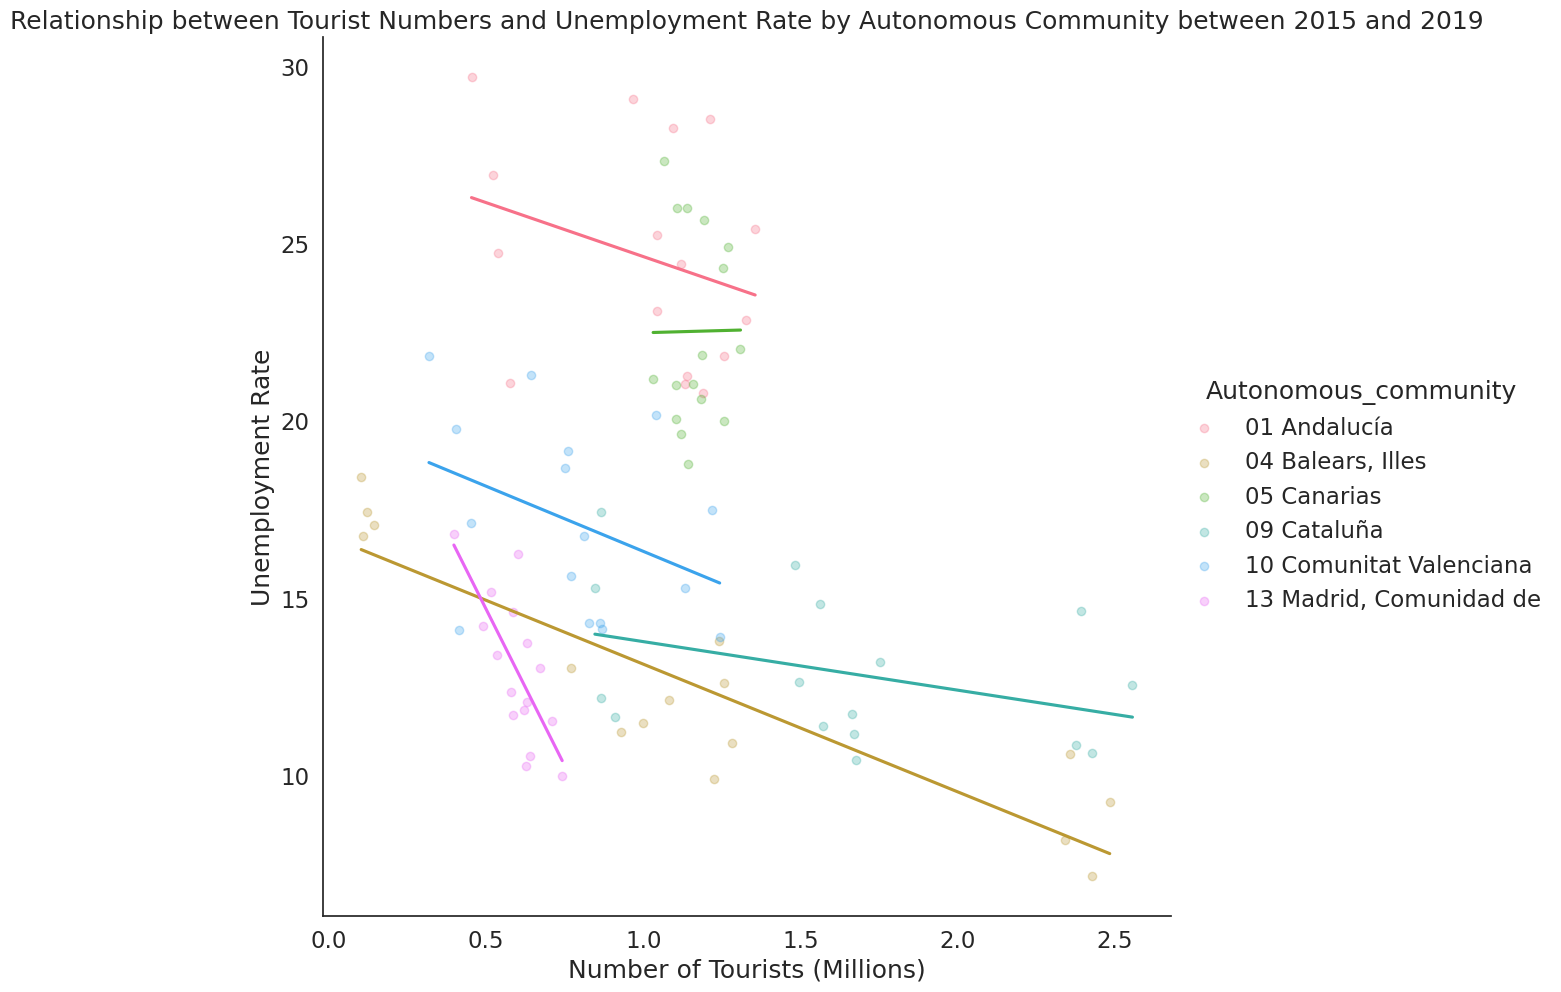

In [14]:
sns.lmplot(data=filtered_df_top_six,
           x='Monthly_number_of_tourists_millions',
           y='Unemployment_rate',
           ci=None,
           hue='Autonomous_community',
           height=10,
           legend=True,
           palette='husl',
           scatter_kws={'alpha':.3})

# Add labels and title
plt.xlabel('Number of Tourists (Millions)')
plt.ylabel('Unemployment Rate')
plt.title('Relationship between Tourist Numbers and Unemployment Rate by Autonomous Community between 2015 and 2019')

plt.show()

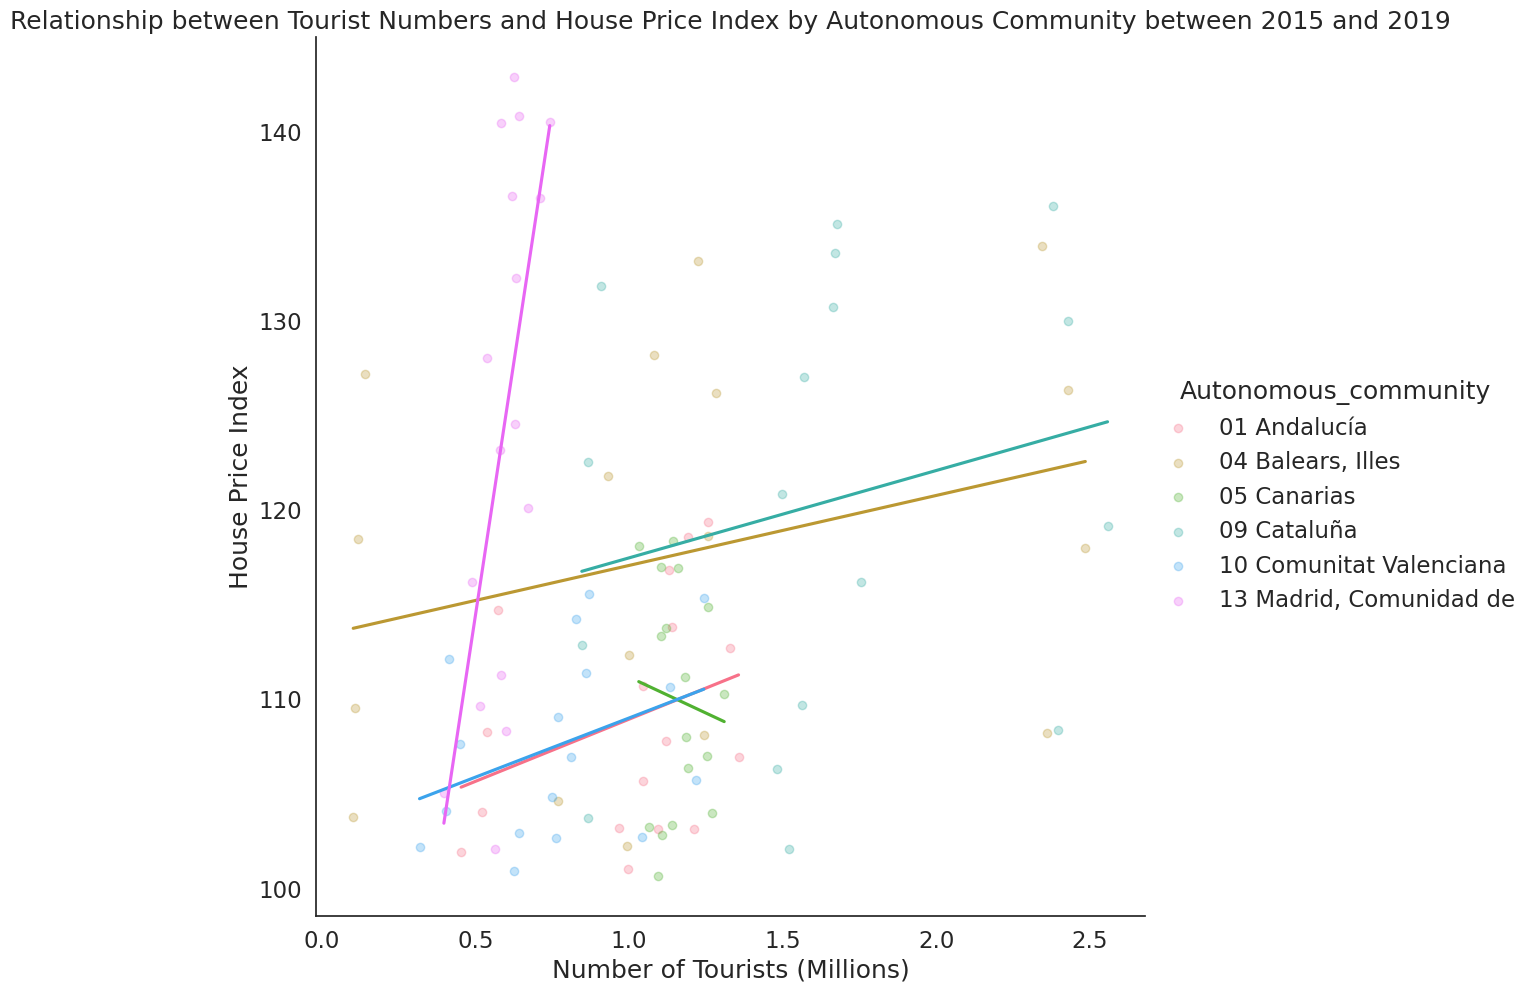

In [15]:
sns.lmplot(data=filtered_df_top_six,
           x='Monthly_number_of_tourists_millions',
           y='HPI',
           ci=None,
           hue='Autonomous_community',
           height=10,
           legend=True,
           palette='husl',
           scatter_kws={'alpha':.3})

# Add labels and title
plt.xlabel('Number of Tourists (Millions)')
plt.ylabel('House Price Index')
plt.title('Relationship between Tourist Numbers and House Price Index by Autonomous Community between 2015 and 2019')

plt.show()

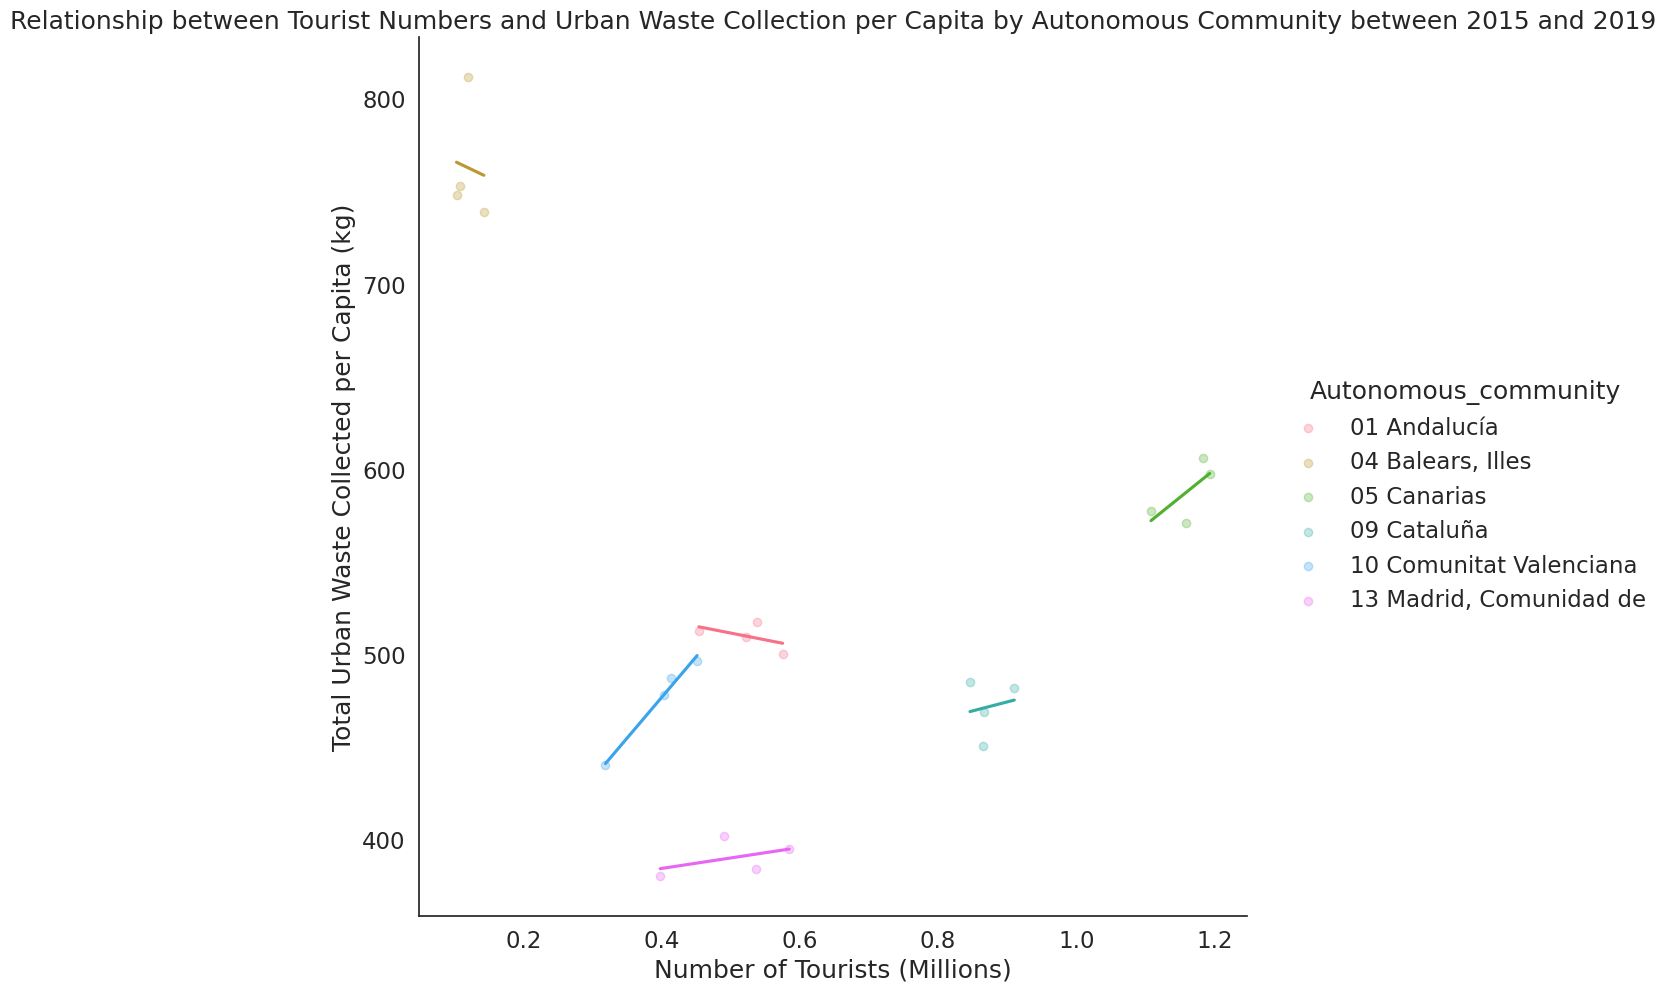

In [16]:
sns.lmplot(data=filtered_df_top_six,
           x='Monthly_number_of_tourists_millions',
           y='total_waste_capita',
           ci=None,
           hue='Autonomous_community',
           height=10,
           legend=True,
           palette='husl',
           scatter_kws={'alpha':.3})

# Add labels and title
plt.xlabel('Number of Tourists (Millions)')
plt.ylabel('Total Urban Waste Collected per Capita (kg)')
plt.title('Relationship between Tourist Numbers and Urban Waste Collection per Capita by Autonomous Community between 2015 and 2019')

plt.show()

#only yearly data for waste collection so not enough data points

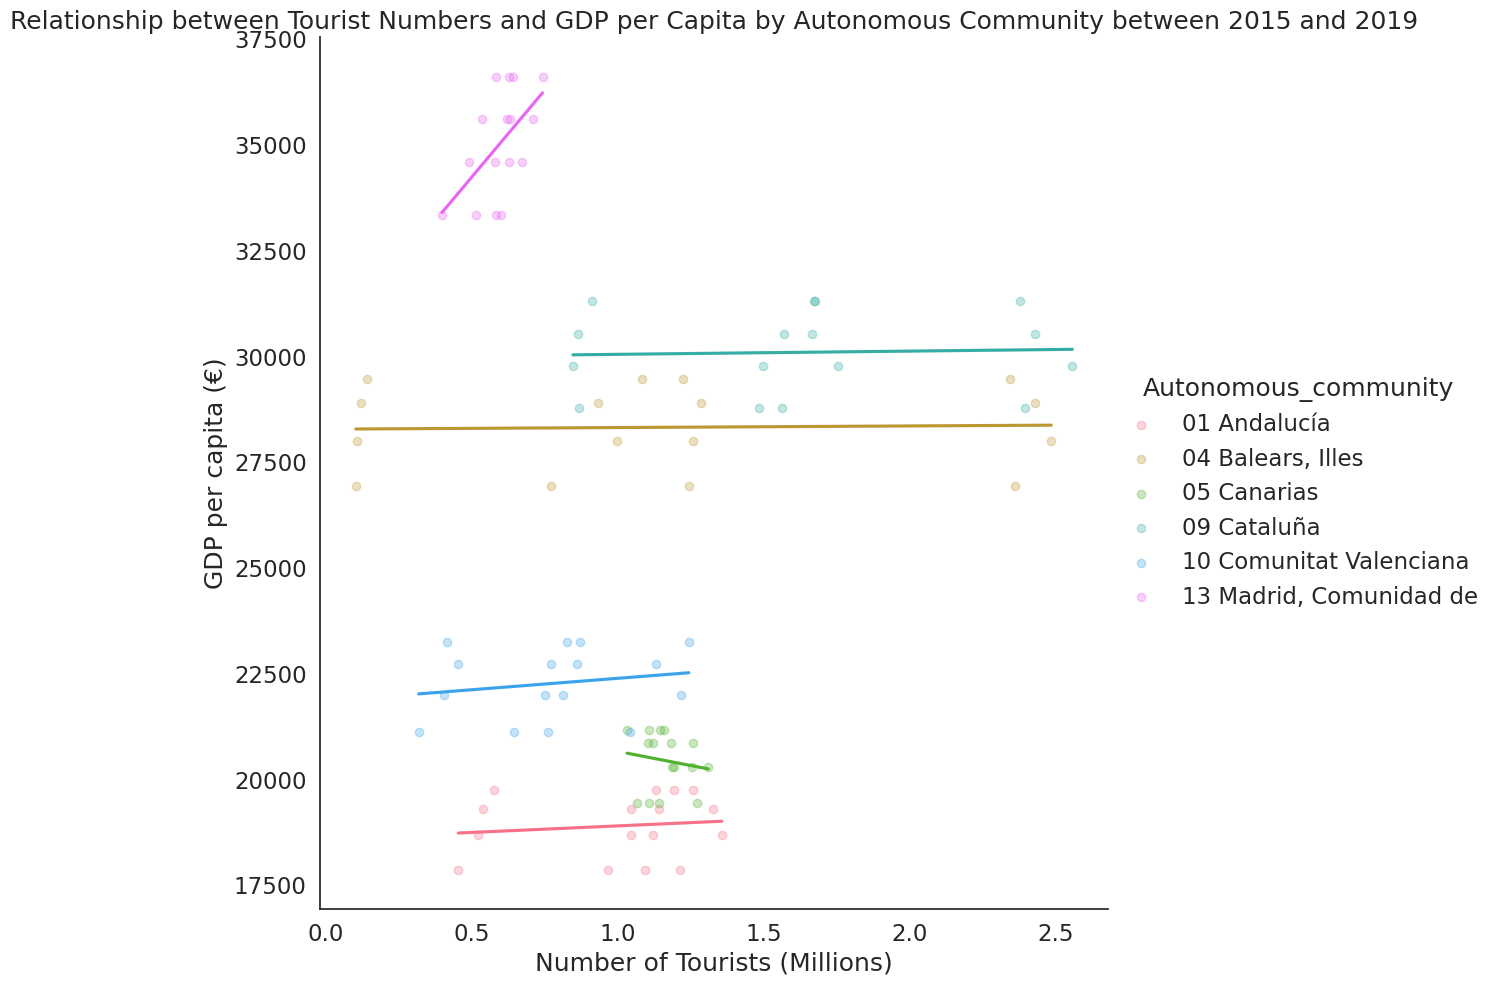

In [17]:
sns.lmplot(data=filtered_df_top_six,
           x='Monthly_number_of_tourists_millions',
           y='GDP_per_capita',
           ci=None,
           hue='Autonomous_community',
           height=10,
           legend=True,
           palette='husl',
           scatter_kws={'alpha':.3})

# Add labels and title
plt.xlabel('Number of Tourists (Millions)')
plt.ylabel('GDP per capita (€)')
plt.title('Relationship between Tourist Numbers and GDP per Capita by Autonomous Community between 2015 and 2019')

plt.show()


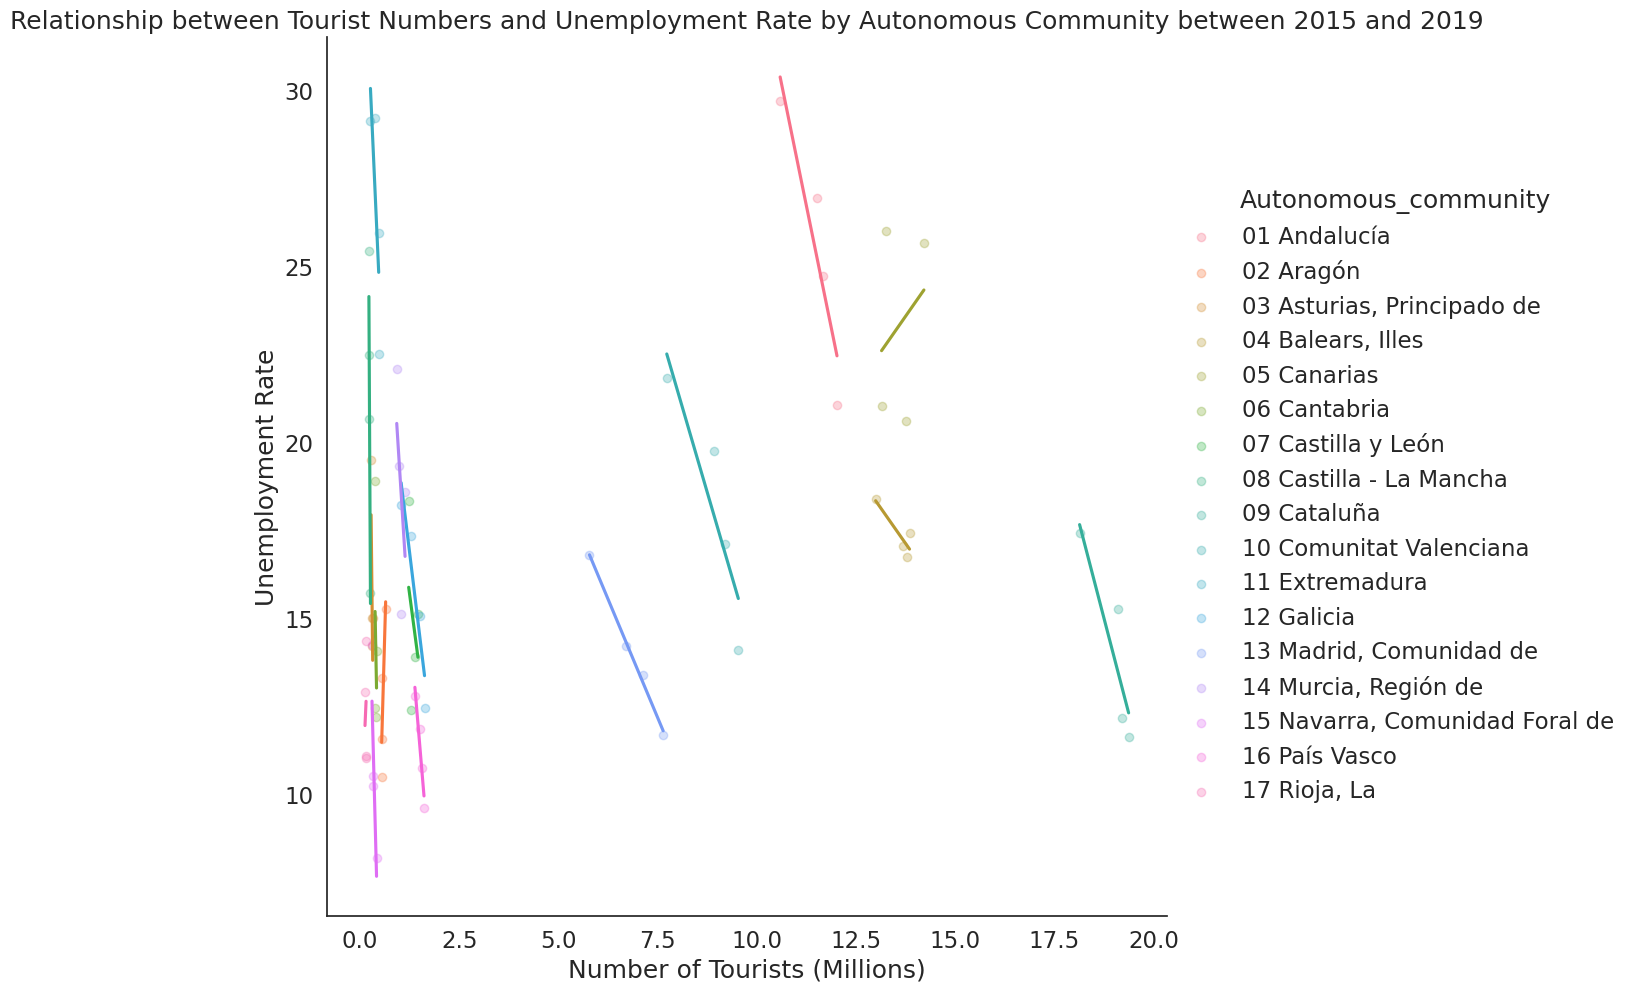

In [18]:
sns.lmplot(data=filtered_df_only_AC,
           x='Yearly_tourist_numbers_millions',
           y='Unemployment_rate',
           ci=None,
           hue='Autonomous_community',
           height=10,
           legend=True,
           palette='husl',
           scatter_kws={'alpha':.3})

# Add labels and title
plt.xlabel('Number of Tourists (Millions)')
plt.ylabel('Unemployment Rate')
plt.title('Relationship between Tourist Numbers and Unemployment Rate by Autonomous Community between 2015 and 2019')

plt.show()

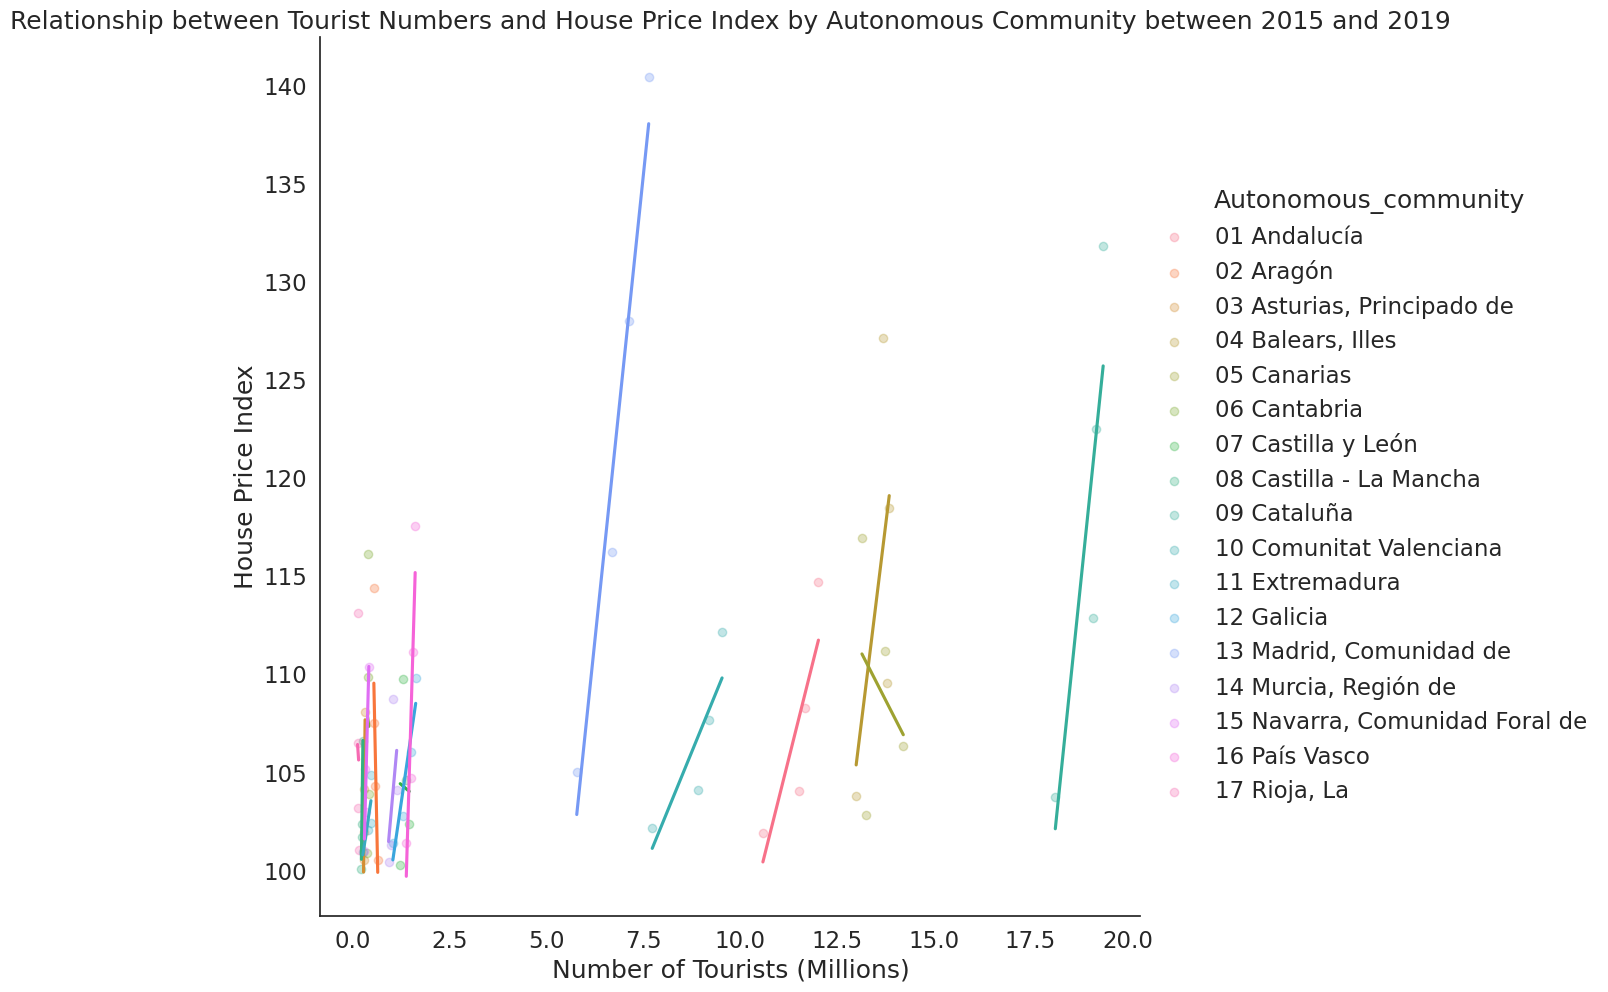

In [19]:
sns.lmplot(data=filtered_df_only_AC,
           x='Yearly_tourist_numbers_millions',
           y='HPI',
           ci=None,
           hue='Autonomous_community',
           height=10,
           legend=True,
           palette='husl',
           scatter_kws={'alpha':.3})

# Add labels and title
plt.xlabel('Number of Tourists (Millions)')
plt.ylabel('House Price Index')
plt.title('Relationship between Tourist Numbers and House Price Index by Autonomous Community between 2015 and 2019')

plt.show()

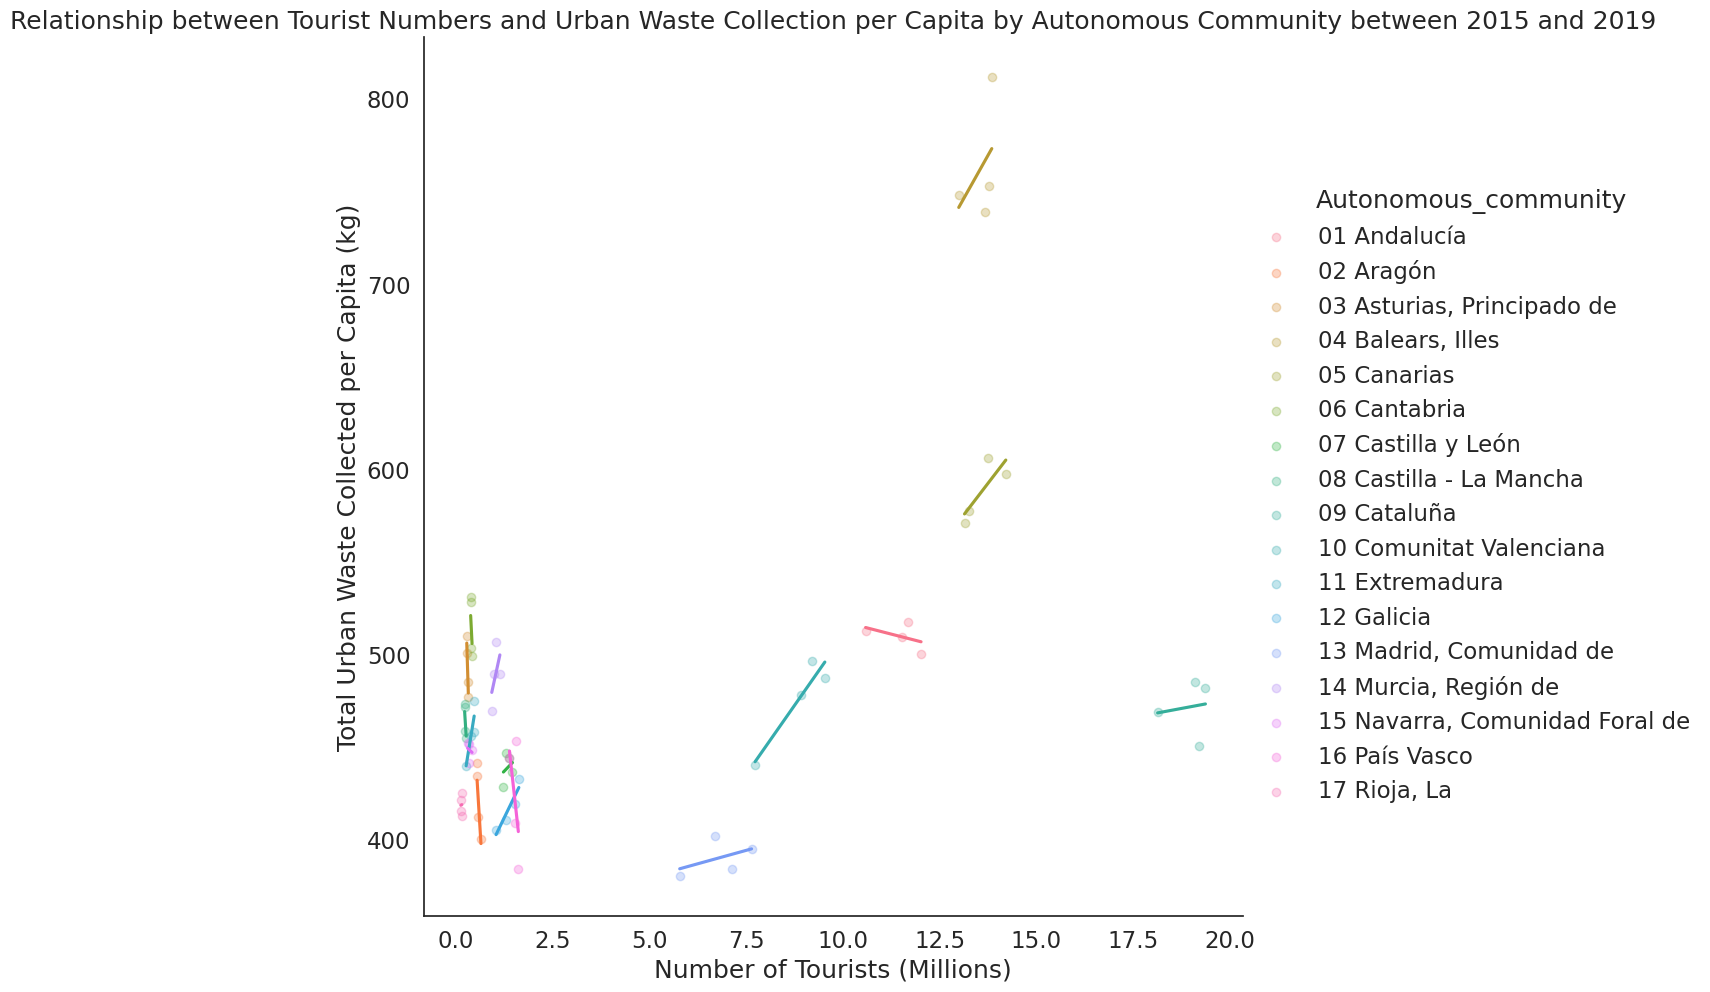

In [20]:
sns.lmplot(data=filtered_df_only_AC,
           x='Yearly_tourist_numbers_millions',
           y='total_waste_capita',
           ci=None,
           hue='Autonomous_community',
           height=10,
           legend=True,
           palette='husl',
           scatter_kws={'alpha':.3})

# Add labels and title
plt.xlabel('Number of Tourists (Millions)')
plt.ylabel('Total Urban Waste Collected per Capita (kg)')
plt.title('Relationship between Tourist Numbers and Urban Waste Collection per Capita by Autonomous Community between 2015 and 2019')

plt.show()

#only yearly data for waste collection so not enough data points

Text(69.75, 0.5, 'Unemployment rate')

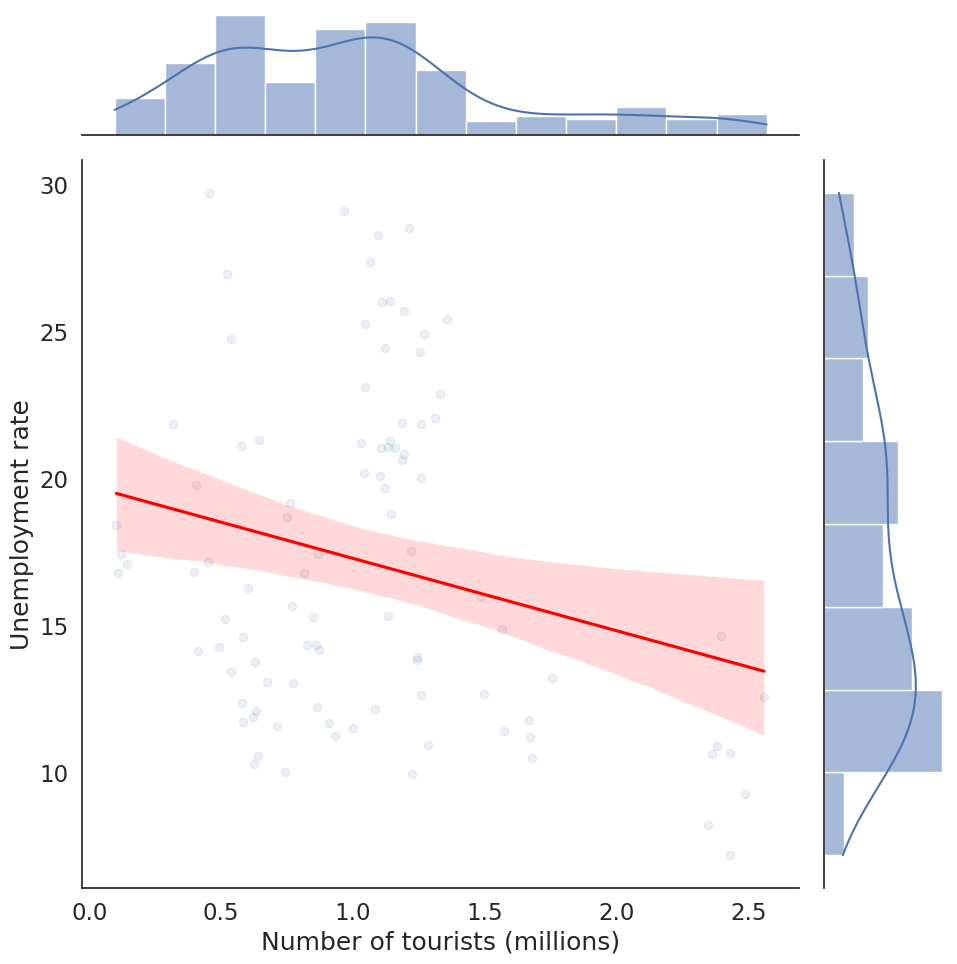

In [21]:
#testing homoscedacticity
sns.jointplot(data=filtered_df_top_six, # plot a scatterplot with a regression line and two histograms
                x='Monthly_number_of_tourists_millions', # set the x axis to be the years of schooling
                y='Unemployment_rate', # set the y axis to be the hourly wage
                kind="reg",  # set the kind of plot to be a regression plot
                scatter_kws=dict(alpha=0.1), # set the transparency of the points to be 0.1 (10%)
                line_kws=dict(color='red'), # set the color of the regression line to red
                height=10) # set the height of the plot to be 10 inches

plt.xlabel('Number of tourists (millions)') # add a label to the x axis
plt.ylabel('Unemployment rate') # add a label to the y axis

Text(69.75, 0.5, 'House Price Index')

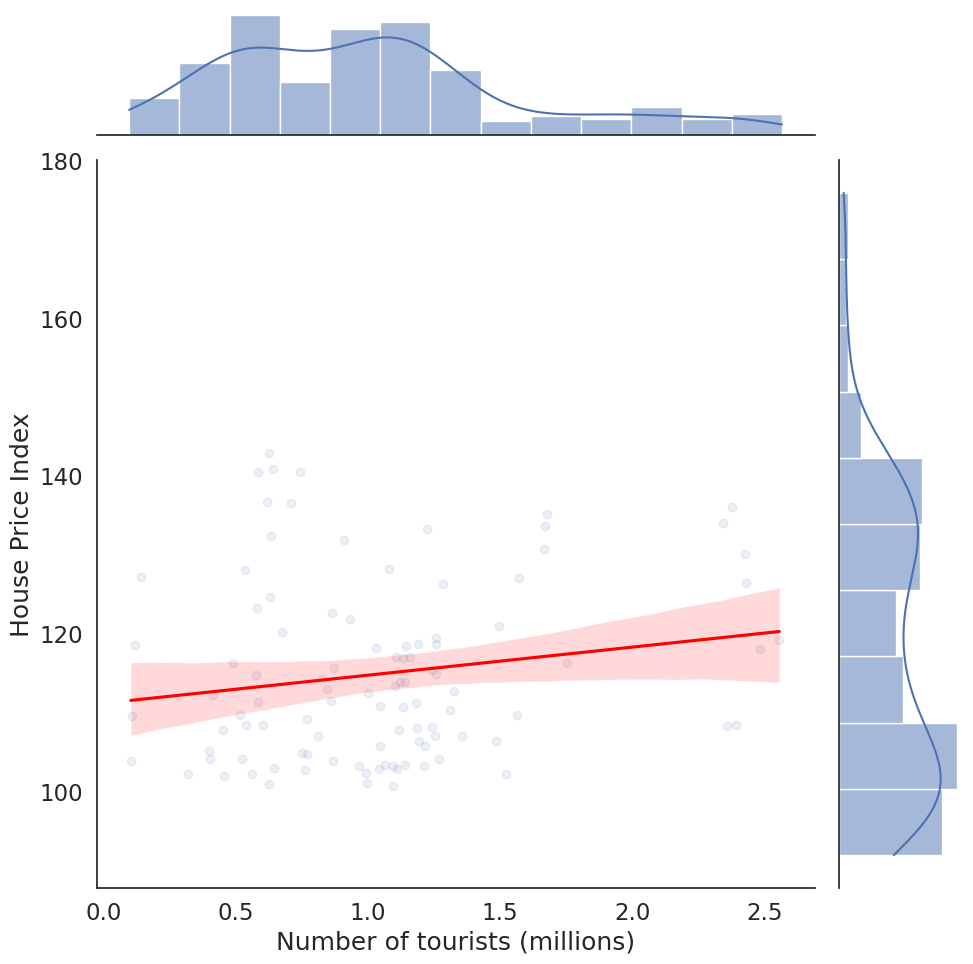

In [22]:
#testing homoscedacticity
sns.jointplot(data=filtered_df_top_six, # plot a scatterplot with a regression line and two histograms
                x='Monthly_number_of_tourists_millions', # set the x axis to be the years of schooling
                y='HPI', # set the y axis to be the hourly wage
                kind="reg",  # set the kind of plot to be a regression plot
                scatter_kws=dict(alpha=0.1), # set the transparency of the points to be 0.1 (10%)
                line_kws=dict(color='red'), # set the color of the regression line to red
                height=10) # set the height of the plot to be 10 inches

plt.xlabel('Number of tourists (millions)') # add a label to the x axis
plt.ylabel('House Price Index') # add a label to the y axis

Text(69.75, 0.5, 'Total urban waste collection per capita (kg)')

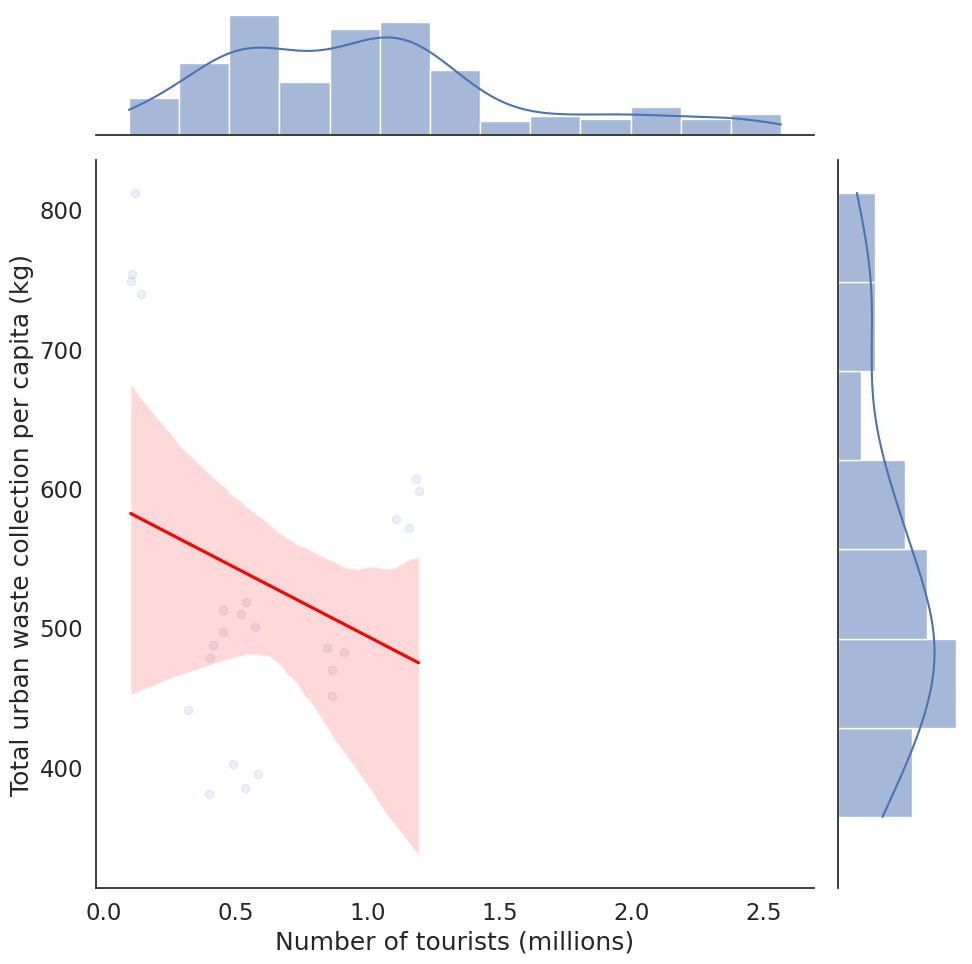

In [23]:
#testing homoscedacticity
sns.jointplot(data=filtered_df_top_six, # plot a scatterplot with a regression line and two histograms
                x='Monthly_number_of_tourists_millions', # set the x axis to be the years of schooling
                y='total_waste_capita', # set the y axis to be the hourly wage
                kind="reg",  # set the kind of plot to be a regression plot
                scatter_kws=dict(alpha=0.1), # set the transparency of the points to be 0.1 (10%)
                line_kws=dict(color='red'), # set the color of the regression line to red
                height=10) # set the height of the plot to be 10 inches

plt.xlabel('Number of tourists (millions)') # add a label to the x axis
plt.ylabel('Total urban waste collection per capita (kg)') # add a label to the y axis

Text(0.5, 1.0, 'Correlation Matrix')

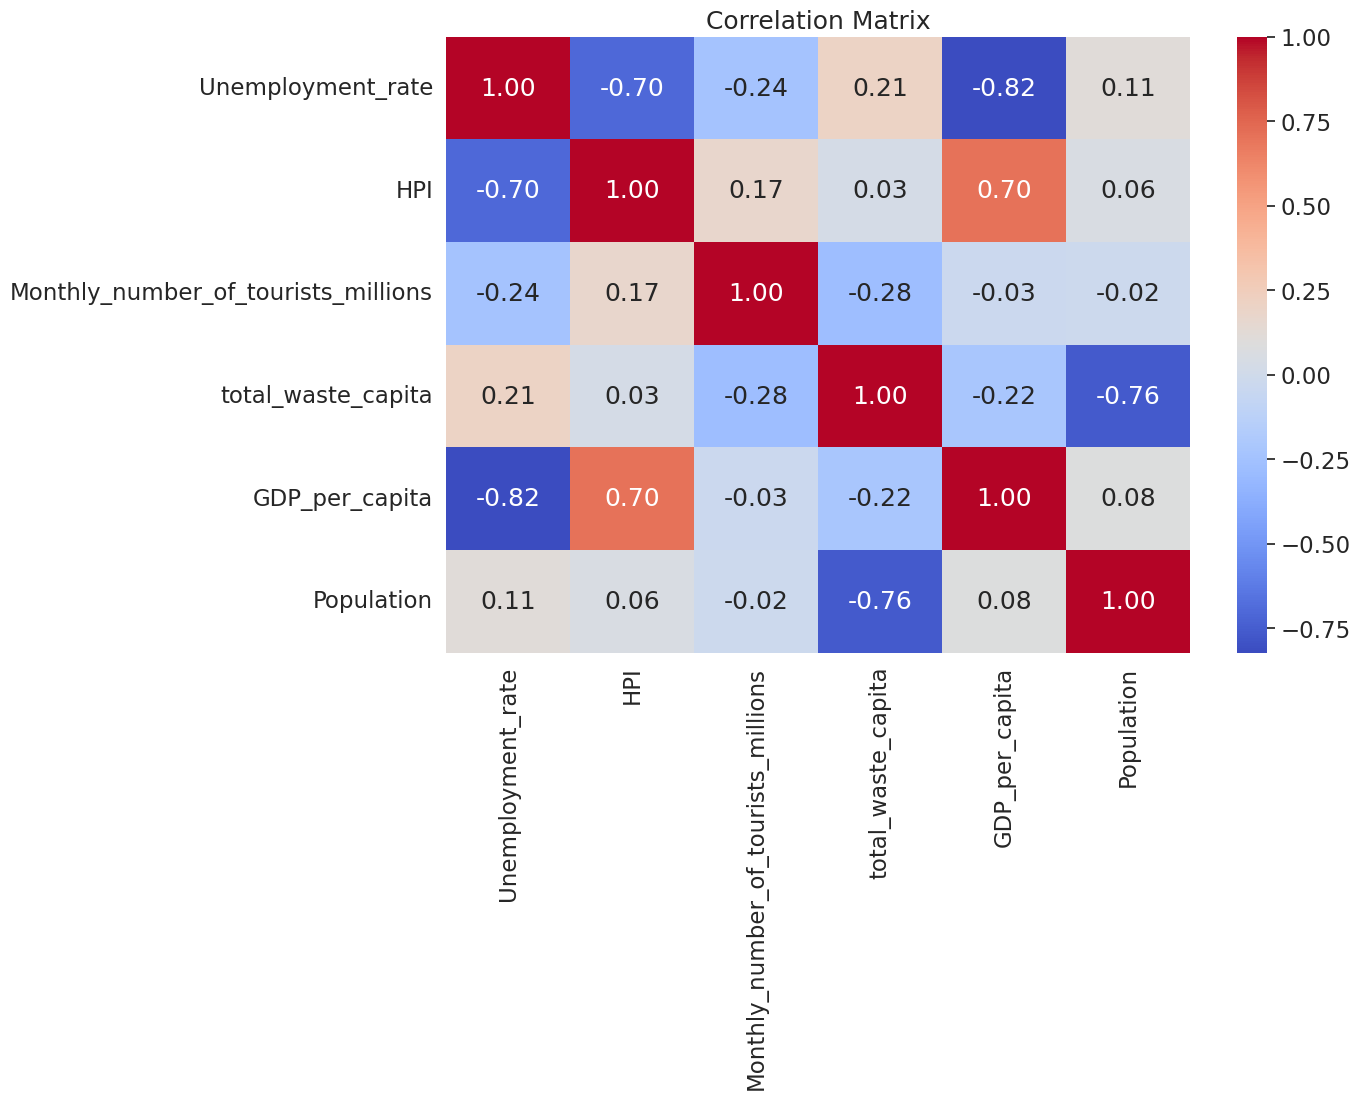

In [24]:
#multicollinearity

sns.heatmap(filtered_df_top_six[['Unemployment_rate','HPI','Monthly_number_of_tourists_millions', 'total_waste_capita', 'GDP_per_capita', 'Population']].corr(), # plot a correlation matrix
            annot=True, # show the correlation values on the plot
            fmt=".2f", # set the format of the correlation values to be two decimal places
            cmap='coolwarm') # set the color palette to be coolwarm (blue for negative correlations, red for positive correlations)

plt.title('Correlation Matrix') # add a title

In [25]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

def drop_column_using_vif_(df, list_var_not_to_remove=None, thresh=5):
    '''
    Calculates VIF each feature in a pandas dataframe, and repeatedly drop the columns with the highest VIF
    A constant must be added to variance_inflation_factor or the results will be incorrect

    :param df: the pandas dataframe containing only the predictor features, not the response variable
    :param list_var_not_to_remove: the list of variables that should not be removed even though it has a high VIF. For example, dummy (or indicator) variables represent a categorical variable with three or more categories.
    :param thresh: the max VIF value before the feature is removed from the dataframe
    :return: dataframe with multicollinear features removed
    '''
    df = df.replace([np.inf, -np.inf], np.nan).dropna()  # Replace inf with nan and drop rows with nan

    while True:
        # adding a constatnt item to the data
        df_with_const = add_constant(df)

        vif_df = pd.Series([variance_inflation_factor(df_with_const.values, i)
               for i in range(df_with_const.shape[1])], name= "VIF",
              index=df_with_const.columns).to_frame()

        # drop the const as const should not be removed
        vif_df = vif_df.drop('const')

        # drop the variables that should not be removed
        if list_var_not_to_remove is not None:
            vif_df = vif_df.drop(list_var_not_to_remove)

        print('Max VIF:', vif_df.VIF.max())

        # if the largest VIF is above the thresh, remove a variable with the largest VIF
        if vif_df.VIF.max() > thresh:
            # If there are multiple variables with the maximum VIF, choose the first one
            index_to_drop = vif_df.index[vif_df.VIF == vif_df.VIF.max()].tolist()[0]
            print('Dropping: {}'.format(index_to_drop))
            df = df.drop(columns = index_to_drop)
        else:
            # No VIF is above threshold. Exit the loop
            break

    return df

In [26]:
ind_vars=['Unemployment_rate','HPI', 'total_waste_capita', 'GDP_per_capita', 'Monthly_number_of_tourists_millions', 'Population' ]

vif = drop_column_using_vif_(filtered_df_top_six[ind_vars], thresh=5)
print("The columns remaining after VIF selection are:")
print(vif.columns)


Max VIF: 4.137730935469394
The columns remaining after VIF selection are:
Index(['Unemployment_rate', 'HPI', 'total_waste_capita', 'GDP_per_capita',
       'Monthly_number_of_tourists_millions', 'Population'],
      dtype='object')


In [27]:
!pip install linearmodels
from linearmodels import PanelOLS
from linearmodels import RandomEffects
import statsmodels.formula.api as smf
from linearmodels.panel import compare



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 45.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.7/115.7 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 3.3 MB/s eta 0:00:00


In [28]:
filtered_df_top_six

,Autonomous_community,Period,Monthly_number_of_tourists,GDP_per_capita,Unemployment_rate,HPI,total_waste_capita,Total_mixed_waste,Total_waste_no_CDW_and_other,Yearly_tourist_numbers,Monthly_number_of_tourists_millions,Total_mixed_waste_millions,Yearly_tourist_numbers_millions,Population,Population_millions
0,01 Andalucía,2007-01-01,NaN,NaN,NaN,127.081,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"04 Balears, Illes",2007-01-01,NaN,NaN,NaN,134.284,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,05 Canarias,2007-01-01,NaN,NaN,NaN,132.560,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,09 Cataluña,2007-01-01,NaN,NaN,NaN,170.691,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10 Comunitat Valenciana,2007-01-01,NaN,NaN,NaN,137.102,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1618,"04 Balears, Illes",2020-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1171543.0,1.171543
1619,05 Canarias,2020-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2175952.0,2.175952
1623,09 Cataluña,2020-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7780479.0,7.780479
1624,10 Comunitat Valenciana,2020-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5057353.0,5.057353


In [30]:
filtered_df_top_six=filtered_df_top_six.set_index(['Autonomous_community','Period']) # set the index to the county fips code and the year
panel = PanelOLS.from_formula('Unemployment_rate ~ 1  + Population + Monthly_number_of_tourists_millions  + EntityEffects',filtered_df_top_six).fit() # run a fixed effects model
print(compare({'Fixed Effects': panel,}, stars=True)) # print the model formatted as a regression table

                       Model Comparison                      
                                                Fixed Effects
-------------------------------------------------------------
Dep. Variable                               Unemployment_rate
Estimator                                            PanelOLS
No. Observations                                           96
Cov. Est.                                          Unadjusted
R-squared                                              0.5031
R-Squared (Within)                                     0.5031
R-Squared (Between)                                   -322.75
R-Squared (Overall)                                   -248.94
F-statistic                                            44.549
P-value (F-stat)                                       0.0000
=====================================     ===================
Intercept                                           184.80***
                                                     (7.4692)
Populati

In [31]:
panel = PanelOLS.from_formula('Unemployment_rate ~ 1  + GDP_per_capita + Monthly_number_of_tourists_millions  + EntityEffects',filtered_df_top_six).fit() # run a fixed effects model
print(compare({'Fixed Effects': panel,}, stars=True)) # print the model formatted as a regression table
#is population or GDP a better baseline?
#since gdp is quite correlated with unemployment rate and HPI (but not enough to violate mulitcollineartity)

                       Model Comparison                      
                                                Fixed Effects
-------------------------------------------------------------
Dep. Variable                               Unemployment_rate
Estimator                                            PanelOLS
No. Observations                                           96
Cov. Est.                                          Unadjusted
R-squared                                              0.7291
R-Squared (Within)                                     0.7291
R-Squared (Between)                                   -1.5071
R-Squared (Overall)                                   -0.9965
F-statistic                                            118.40
P-value (F-stat)                                       0.0000
=====================================     ===================
Intercept                                           72.803***
                                                     (17.170)
GDP_per_

In [32]:
panel = PanelOLS.from_formula('Unemployment_rate ~ 1  + Monthly_number_of_tourists_millions  + EntityEffects',filtered_df_top_six).fit() # run a fixed effects model
print(compare({'Fixed Effects': panel,}, stars=True)) # print the model formatted as a regression table

                       Model Comparison                      
                                                Fixed Effects
-------------------------------------------------------------
Dep. Variable                               Unemployment_rate
Estimator                                            PanelOLS
No. Observations                                           96
Cov. Est.                                          Unadjusted
R-squared                                              0.2534
R-Squared (Within)                                     0.2534
R-Squared (Between)                                   -0.0015
R-Squared (Overall)                                    0.0567
F-statistic                                            30.211
P-value (F-stat)                                       0.0000
=====================================     ===================
Intercept                                           20.316***
                                                     (32.183)
Monthly_

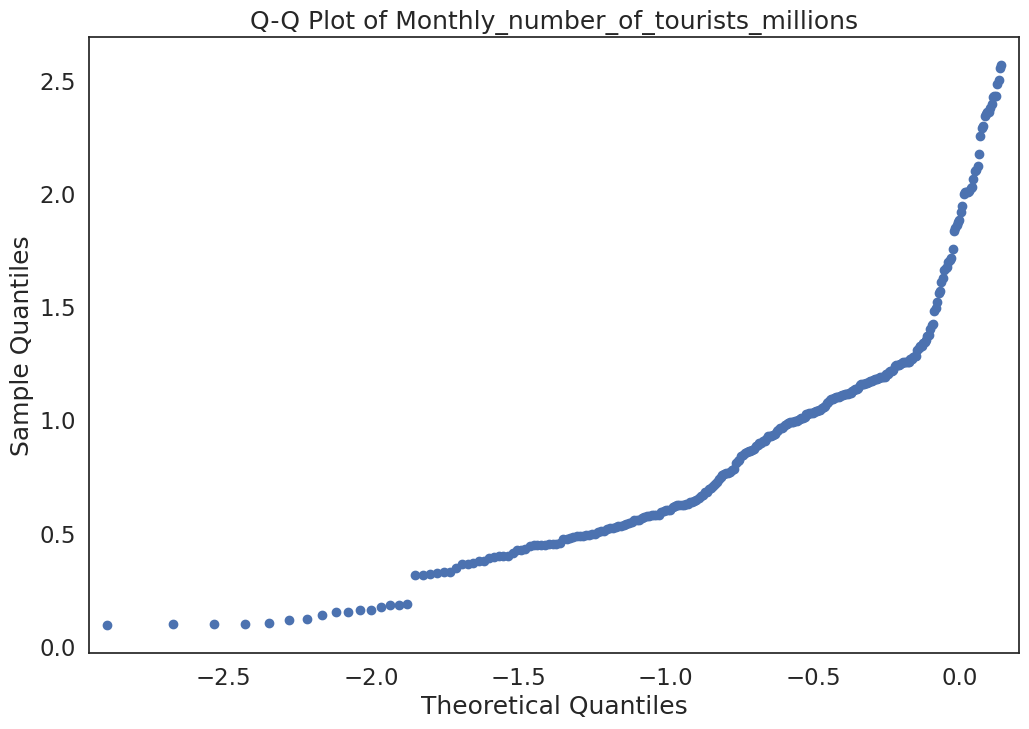

In [34]:
sm.qqplot(filtered_df_top_six['Monthly_number_of_tourists_millions'], line='s')
plt.title('Q-Q Plot of Monthly_number_of_tourists_millions')
plt.show()

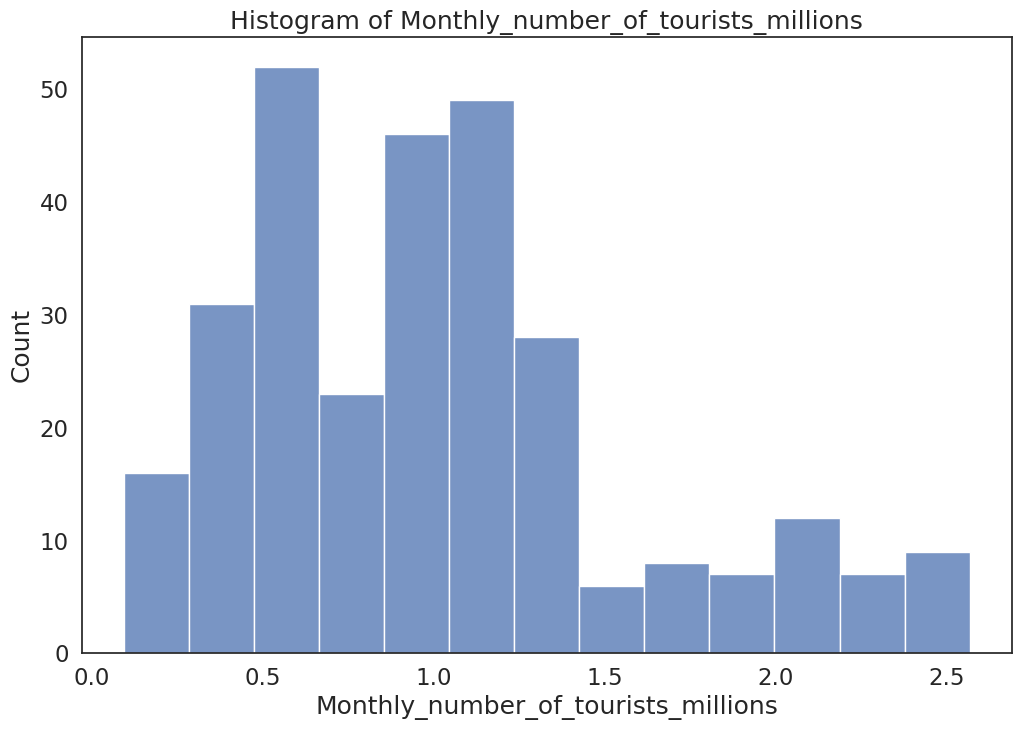

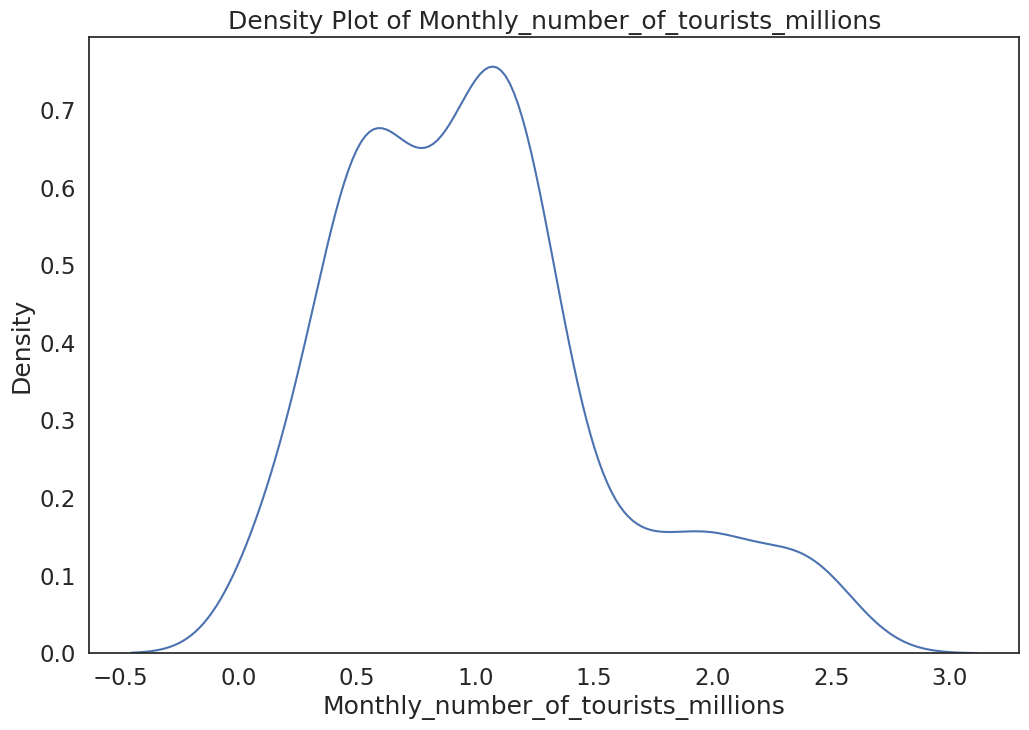

In [35]:
   # Histogram
   sns.histplot(filtered_df_top_six['Monthly_number_of_tourists_millions'], kde=False)
   plt.title('Histogram of Monthly_number_of_tourists_millions')
   plt.show()

   # Density plot
   sns.kdeplot(filtered_df_top_six['Monthly_number_of_tourists_millions'])
   plt.title('Density Plot of Monthly_number_of_tourists_millions')
   plt.show()

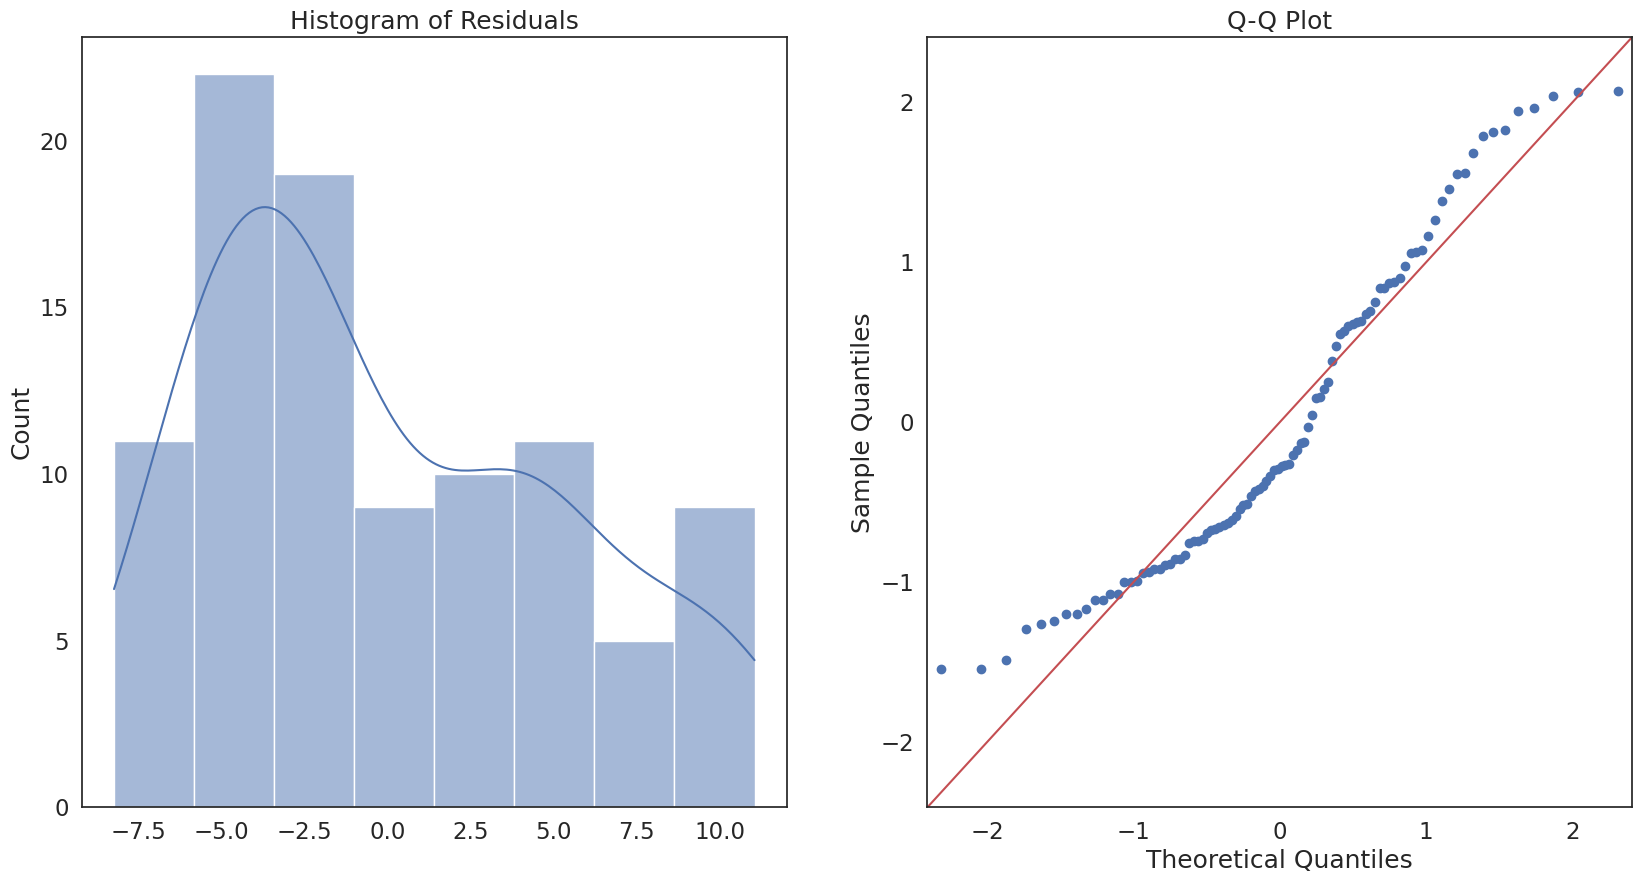

In [44]:
model = ols('Unemployment_rate ~  Monthly_number_of_tourists_millions + Population', data=filtered_df_top_six).fit()  # fit a model
residuals = model.resid # get the residuals

# make the figure wider
plt.rcParams["figure.figsize"] = [20, 10]

f, axes = plt.subplots(1, 2)
sns.histplot(residuals, kde=True, ax=axes[0]) # plot the residuals
axes[0].set_title('Histogram of Residuals') # add a title

sm.qqplot(residuals, line='45', fit=True,  ax=axes[1]) # plot the residuals
axes[1].set_title('Q-Q Plot') # add a title

plt.show() # show the plot

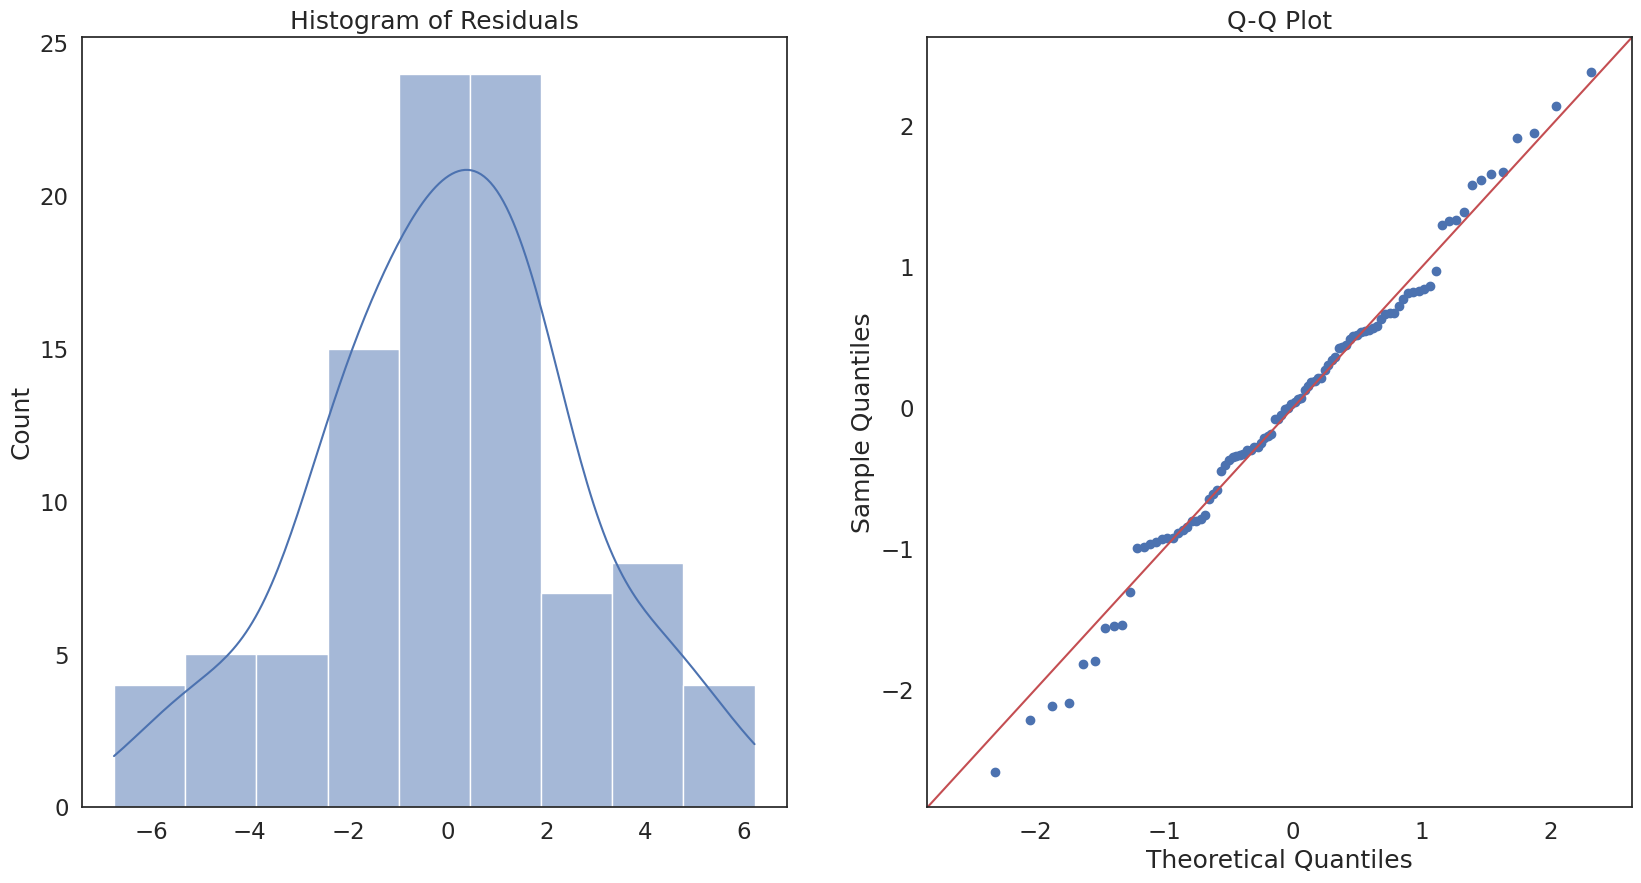

In [45]:
model = ols('Unemployment_rate ~  Monthly_number_of_tourists_millions + GDP_per_capita + Population', data=filtered_df_top_six).fit()  # fit a model
residuals = model.resid # get the residuals

# make the figure wider
plt.rcParams["figure.figsize"] = [20, 10]

f, axes = plt.subplots(1, 2)
sns.histplot(residuals, kde=True, ax=axes[0]) # plot the residuals
axes[0].set_title('Histogram of Residuals') # add a title

sm.qqplot(residuals, line='45', fit=True,  ax=axes[1]) # plot the residuals
axes[1].set_title('Q-Q Plot') # add a title

plt.show() # show the plot

In [ ]:
filtered_df_top_six['log_unemployment']=np.log(filtered_df_top_six['Unemployment_rate'])
filtered_df_top_six['Monthly_number_of_tourists_millions_logged']=np.log(filtered_df_top_six['Monthly_number_of_tourists_millions'])

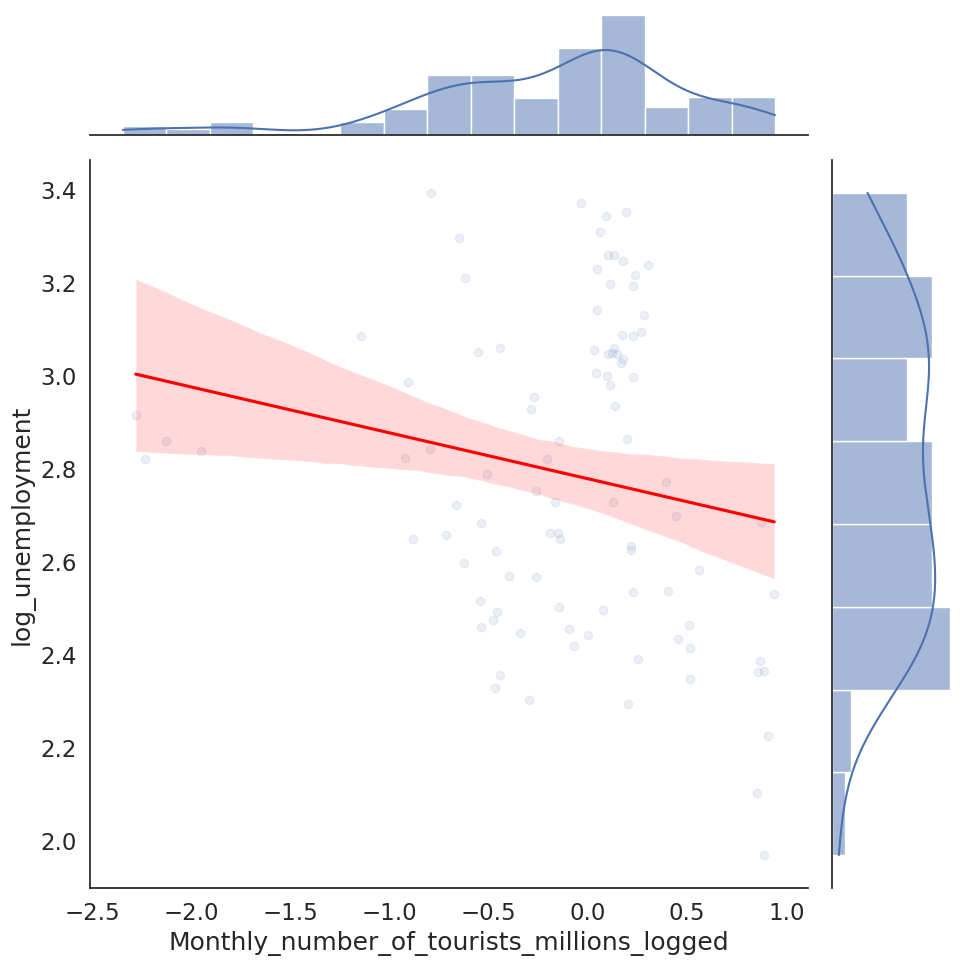

In [41]:
filtered_df_top_six['Monthly_number_of_tourists_millions_logged']=np.log(filtered_df_top_six['Monthly_number_of_tourists_millions'])
sns.jointplot(data=filtered_df_top_six, x='Monthly_number_of_tourists_millions_logged', y='log_unemployment', kind="reg",  scatter_kws=dict(alpha=0.1), line_kws=dict(color='red'), height=10)

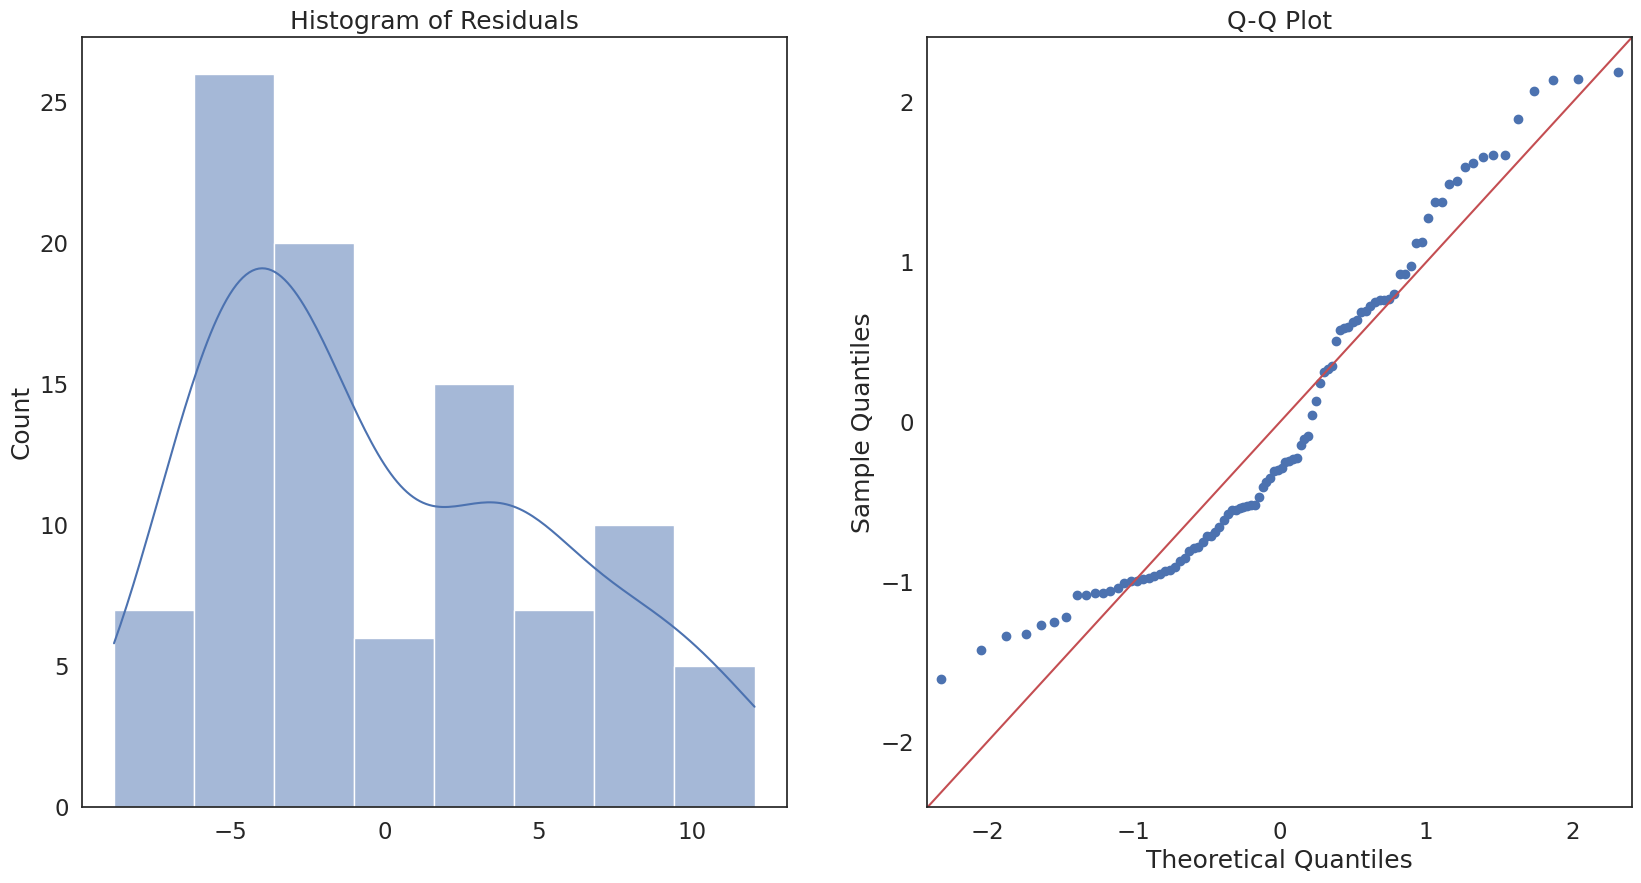

In [58]:
model = ols('Unemployment_rate ~  Monthly_number_of_tourists_millions_logged', data=filtered_df_top_six).fit()  # fit a model
residuals = model.resid # get the residuals

# make the figure wider
plt.rcParams["figure.figsize"] = [20, 10]

f, axes = plt.subplots(1, 2)
sns.histplot(residuals, kde=True, ax=axes[0]) # plot the residuals
axes[0].set_title('Histogram of Residuals') # add a title

sm.qqplot(residuals, line='45', fit=True,  ax=axes[1]) # plot the residuals
axes[1].set_title('Q-Q Plot') # add a title

plt.show() # show the plot

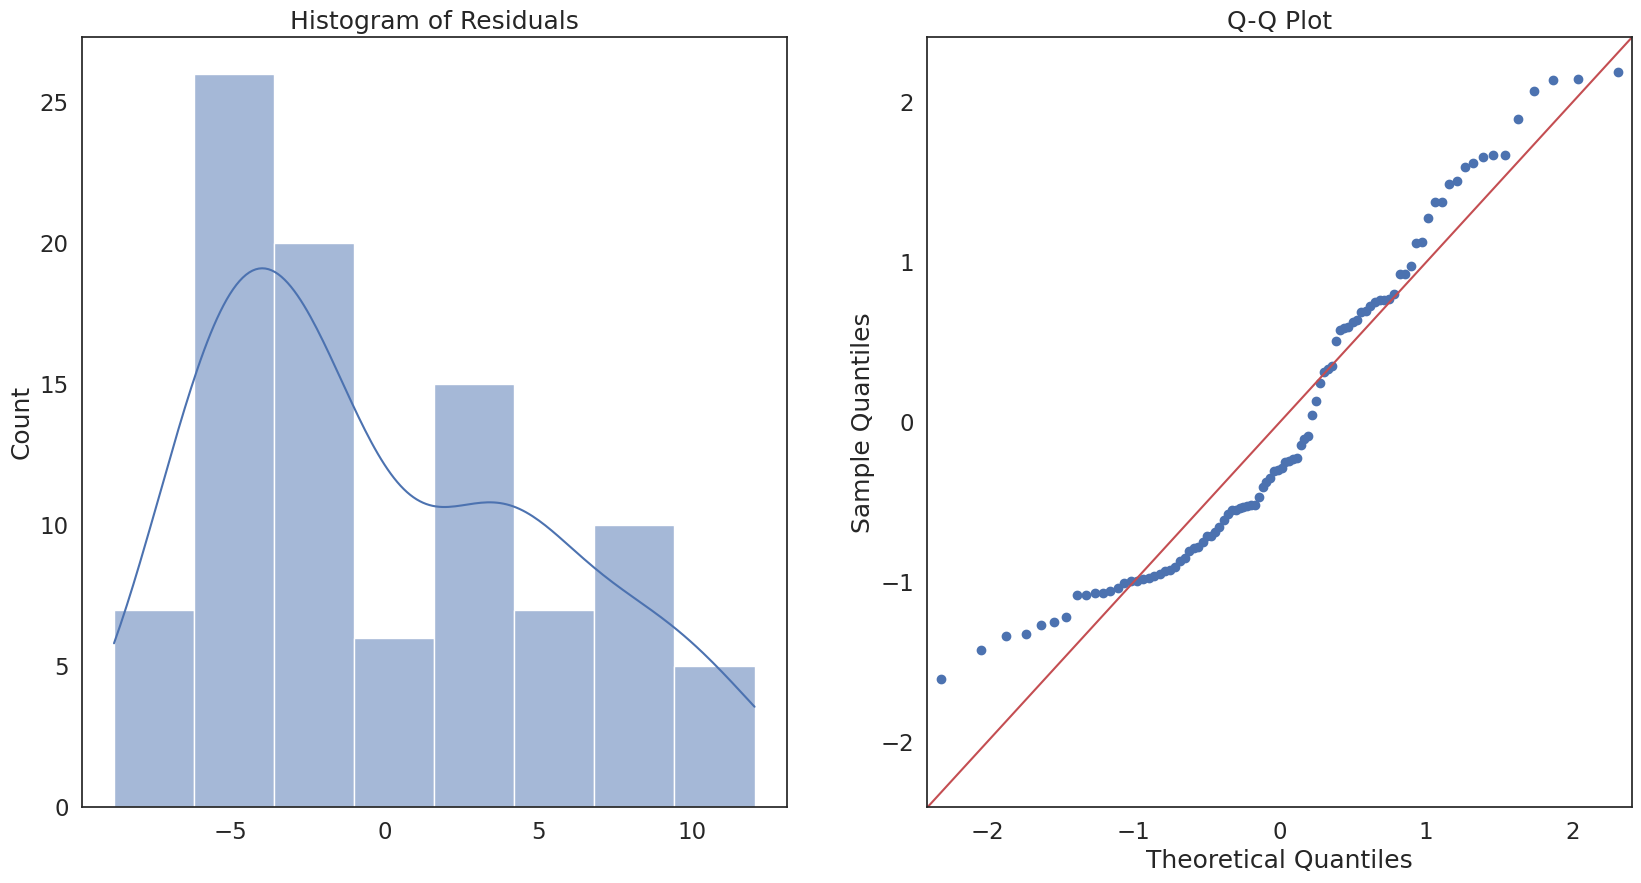

In [59]:
model = ols('log_unemployment ~  Monthly_number_of_tourists_millions_logged', data=filtered_df_top_six).fit()  # fit a model
residuals = model.resid # get the residuals

# make the figure wider
plt.rcParams["figure.figsize"] = [20, 10]

f, axes = plt.subplots(1, 2)
sns.histplot(residuals, kde=True, ax=axes[0]) # plot the residuals
axes[0].set_title('Histogram of Residuals') # add a title

sm.qqplot(residuals, line='45', fit=True,  ax=axes[1]) # plot the residuals
axes[1].set_title('Q-Q Plot') # add a title

plt.show() # show the plot

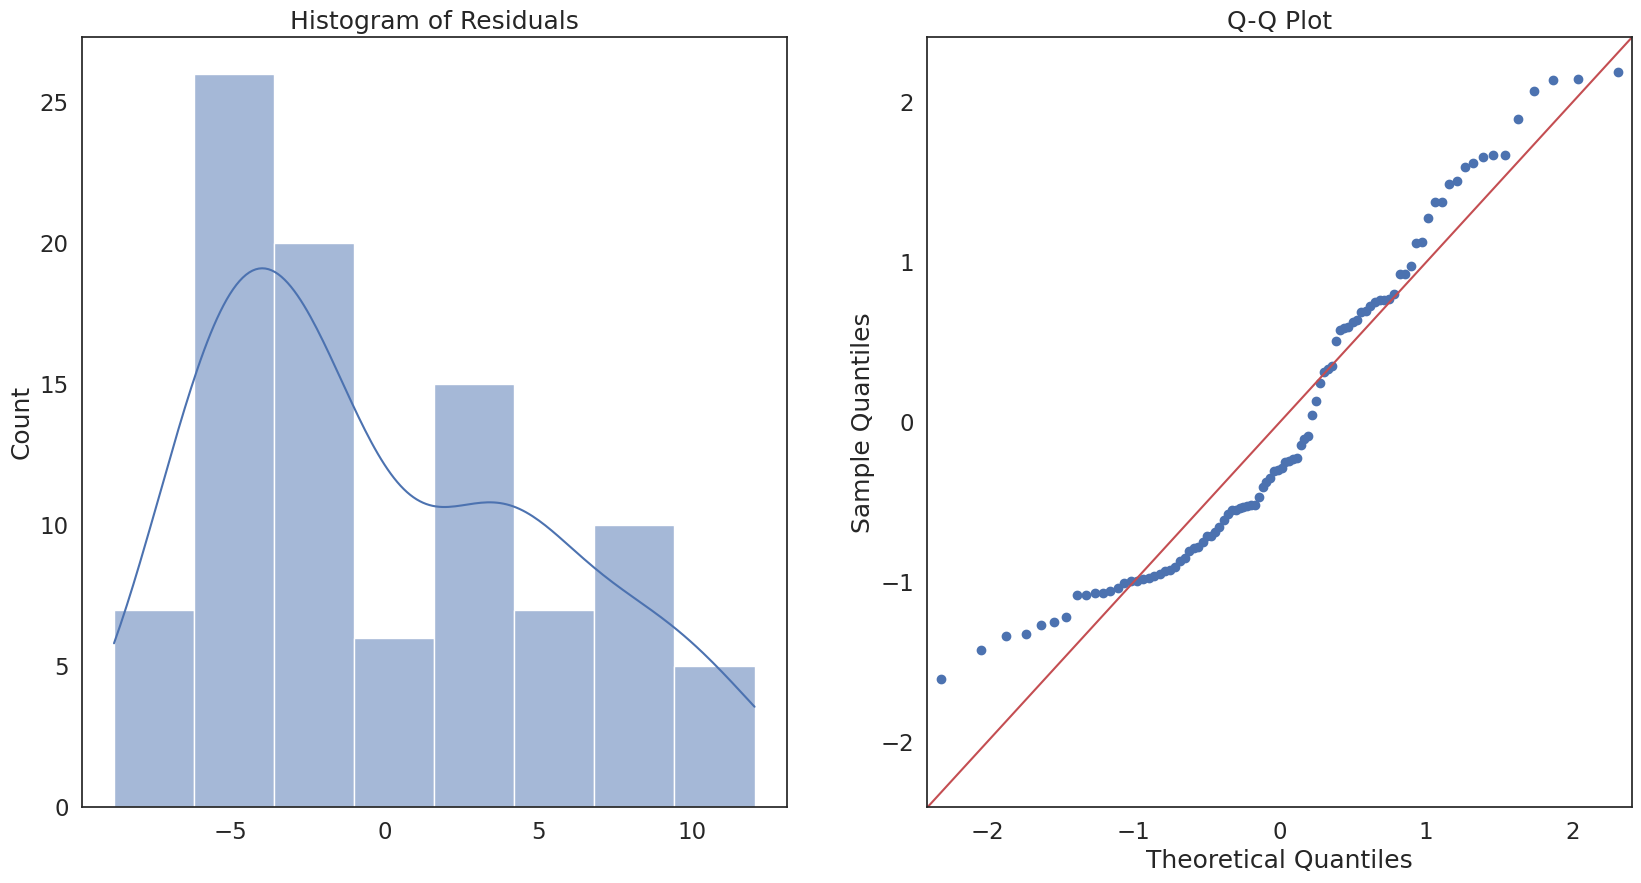

In [60]:
model = ols('log_unemployment ~  Monthly_number_of_tourists_millions', data=filtered_df_top_six).fit()  # fit a model
residuals = model.resid # get the residuals

# make the figure wider
plt.rcParams["figure.figsize"] = [20, 10]

f, axes = plt.subplots(1, 2)
sns.histplot(residuals, kde=True, ax=axes[0]) # plot the residuals
axes[0].set_title('Histogram of Residuals') # add a title

sm.qqplot(residuals, line='45', fit=True,  ax=axes[1]) # plot the residuals
axes[1].set_title('Q-Q Plot') # add a title

plt.show() # show the plot

In [68]:
panel = PanelOLS.from_formula('HPI ~ 1  + Monthly_number_of_tourists_millions + GDP_per_capita + Population + EntityEffects',filtered_df_top_six).fit() # run a fixed effects model
print(compare({'Fixed Effects': panel,}, stars=True))

                    Model Comparison                    
                                           Fixed Effects
--------------------------------------------------------
Dep. Variable                                        HPI
Estimator                                       PanelOLS
No. Observations                                      96
Cov. Est.                                     Unadjusted
R-squared                                         0.9351
R-Squared (Within)                                0.9351
R-Squared (Between)                              -525.52
R-Squared (Overall)                              -198.34
F-statistic                                       417.60
P-value (F-stat)                                  0.0000
=====================================     ==============
Intercept                                     -348.48***
                                               (-8.0462)
Monthly_number_of_tourists_millions            3.2766***
                               

In [70]:
panel = PanelOLS.from_formula('Unemployment_rate ~ 1  + Monthly_number_of_tourists_millions + GDP_per_capita + Population + EntityEffects',filtered_df_top_six).fit() # run a fixed effects model
print(compare({'Fixed Effects': panel,}, stars=True))

                       Model Comparison                      
                                                Fixed Effects
-------------------------------------------------------------
Dep. Variable                               Unemployment_rate
Estimator                                            PanelOLS
No. Observations                                           96
Cov. Est.                                          Unadjusted
R-squared                                              0.7466
R-Squared (Within)                                     0.7466
R-Squared (Between)                                   -69.935
R-Squared (Overall)                                   -53.796
F-statistic                                            85.454
P-value (F-stat)                                       0.0000
=====================================     ===================
Intercept                                              9.4218
                                                     (0.3604)
Monthly_

In [71]:
panel = PanelOLS.from_formula('total_waste_capita ~ 1  + Monthly_number_of_tourists_millions + GDP_per_capita + Population + EntityEffects',filtered_df_top_six).fit() # run a fixed effects model
print(compare({'Fixed Effects': panel,}, stars=True))

                       Model Comparison                       
                                                 Fixed Effects
--------------------------------------------------------------
Dep. Variable                               total_waste_capita
Estimator                                             PanelOLS
No. Observations                                            24
Cov. Est.                                           Unadjusted
R-squared                                               0.2037
R-Squared (Within)                                      0.2037
R-Squared (Between)                                    -17.863
R-Squared (Overall)                                    -17.489
F-statistic                                             1.2791
P-value (F-stat)                                        0.3175
=====================================     ====================
Intercept                                              1372.1*
                                                      (

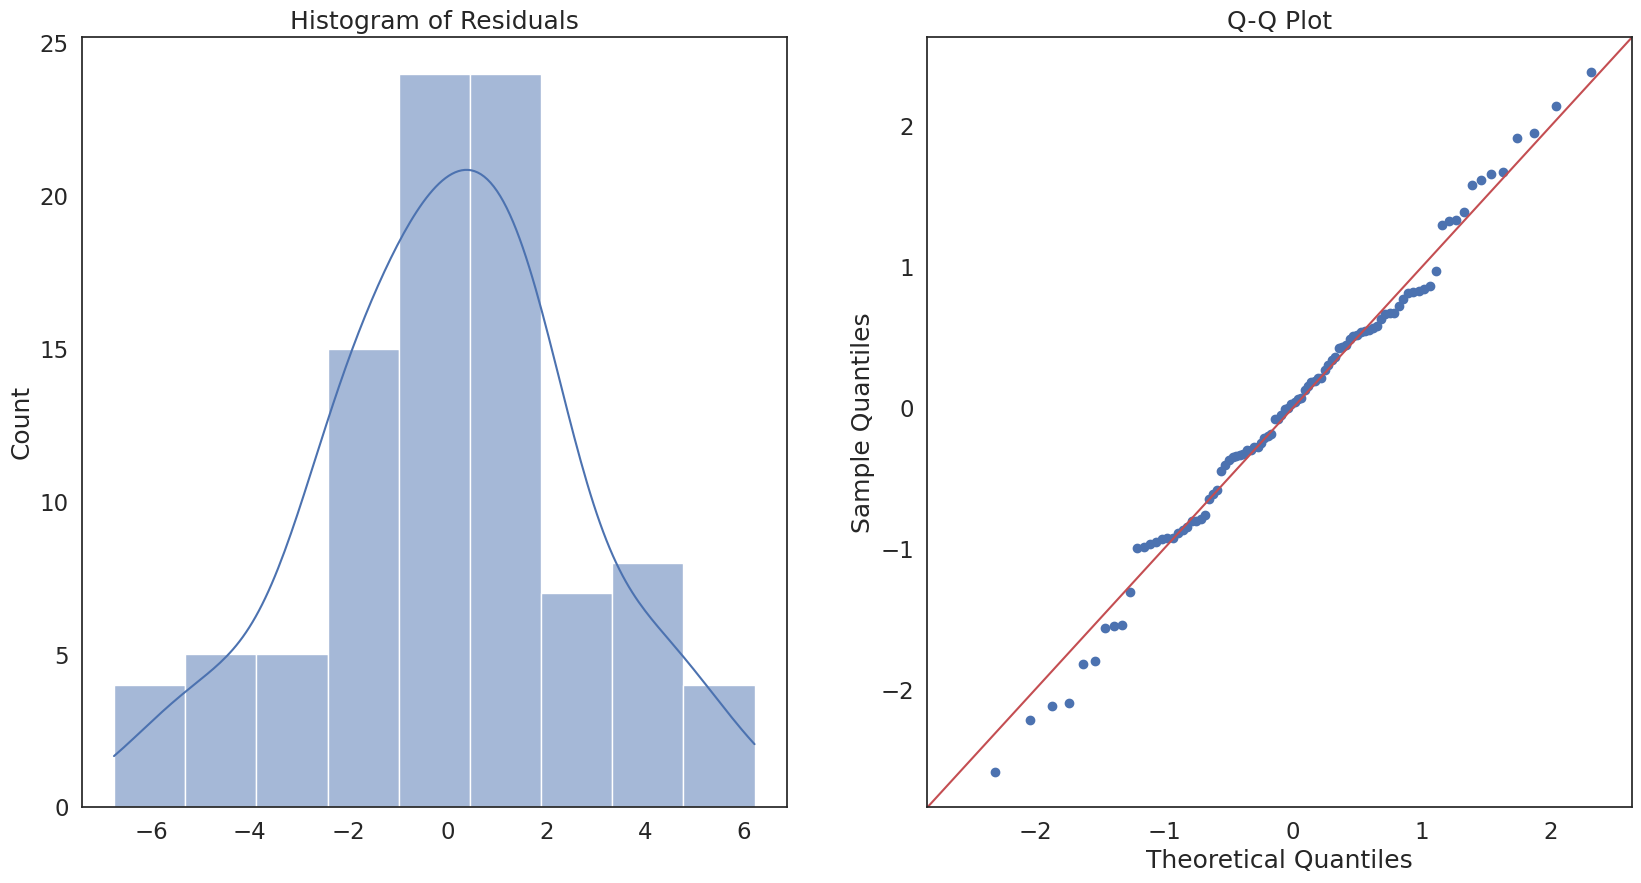

In [73]:
model = ols('Unemployment_rate ~  Monthly_number_of_tourists_millions + GDP_per_capita + Population', data=filtered_df_top_six).fit()  # fit a model
residuals = model.resid # get the residuals

# make the figure wider
plt.rcParams["figure.figsize"] = [20, 10]

f, axes = plt.subplots(1, 2)
sns.histplot(residuals, kde=True, ax=axes[0]) # plot the residuals
axes[0].set_title('Histogram of Residuals') # add a title

sm.qqplot(residuals, line='45', fit=True,  ax=axes[1]) # plot the residuals
axes[1].set_title('Q-Q Plot') # add a title

plt.show() # show the plot

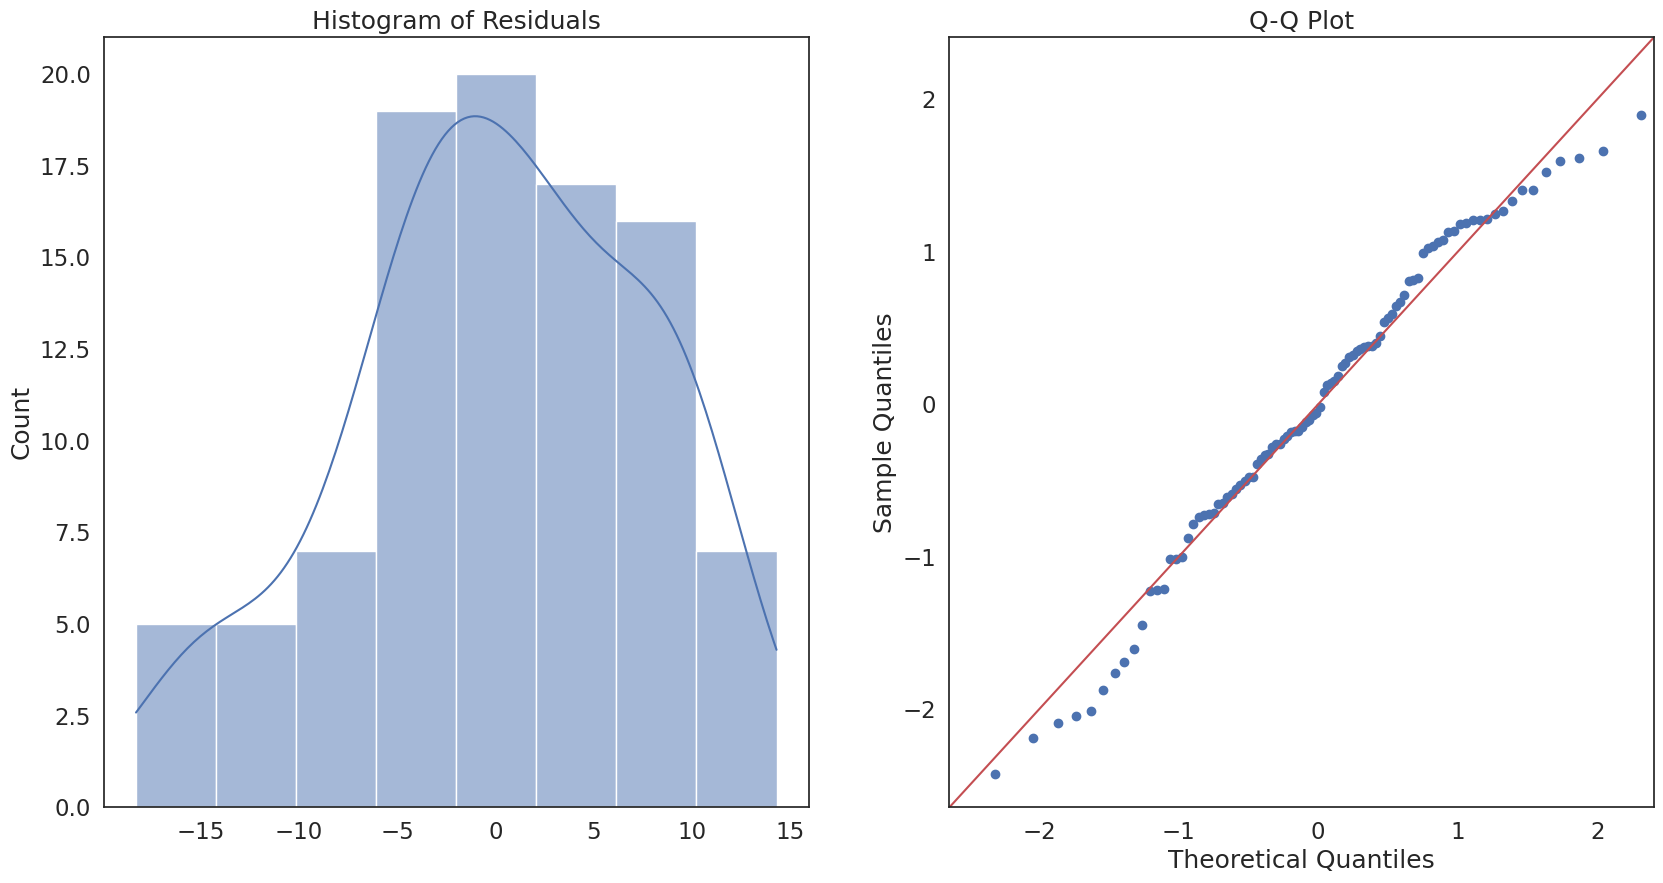

In [77]:
model = ols('HPI ~  Monthly_number_of_tourists_millions + GDP_per_capita + Population', data=filtered_df_top_six).fit()  # fit a model
residuals = model.resid # get the residuals

# make the figure wider
plt.rcParams["figure.figsize"] = [20, 10]

f, axes = plt.subplots(1, 2)
sns.histplot(residuals, kde=True, ax=axes[0]) # plot the residuals
axes[0].set_title('Histogram of Residuals') # add a title

sm.qqplot(residuals, line='45', fit=True,  ax=axes[1]) # plot the residuals
axes[1].set_title('Q-Q Plot') # add a title

plt.show() # show the plot

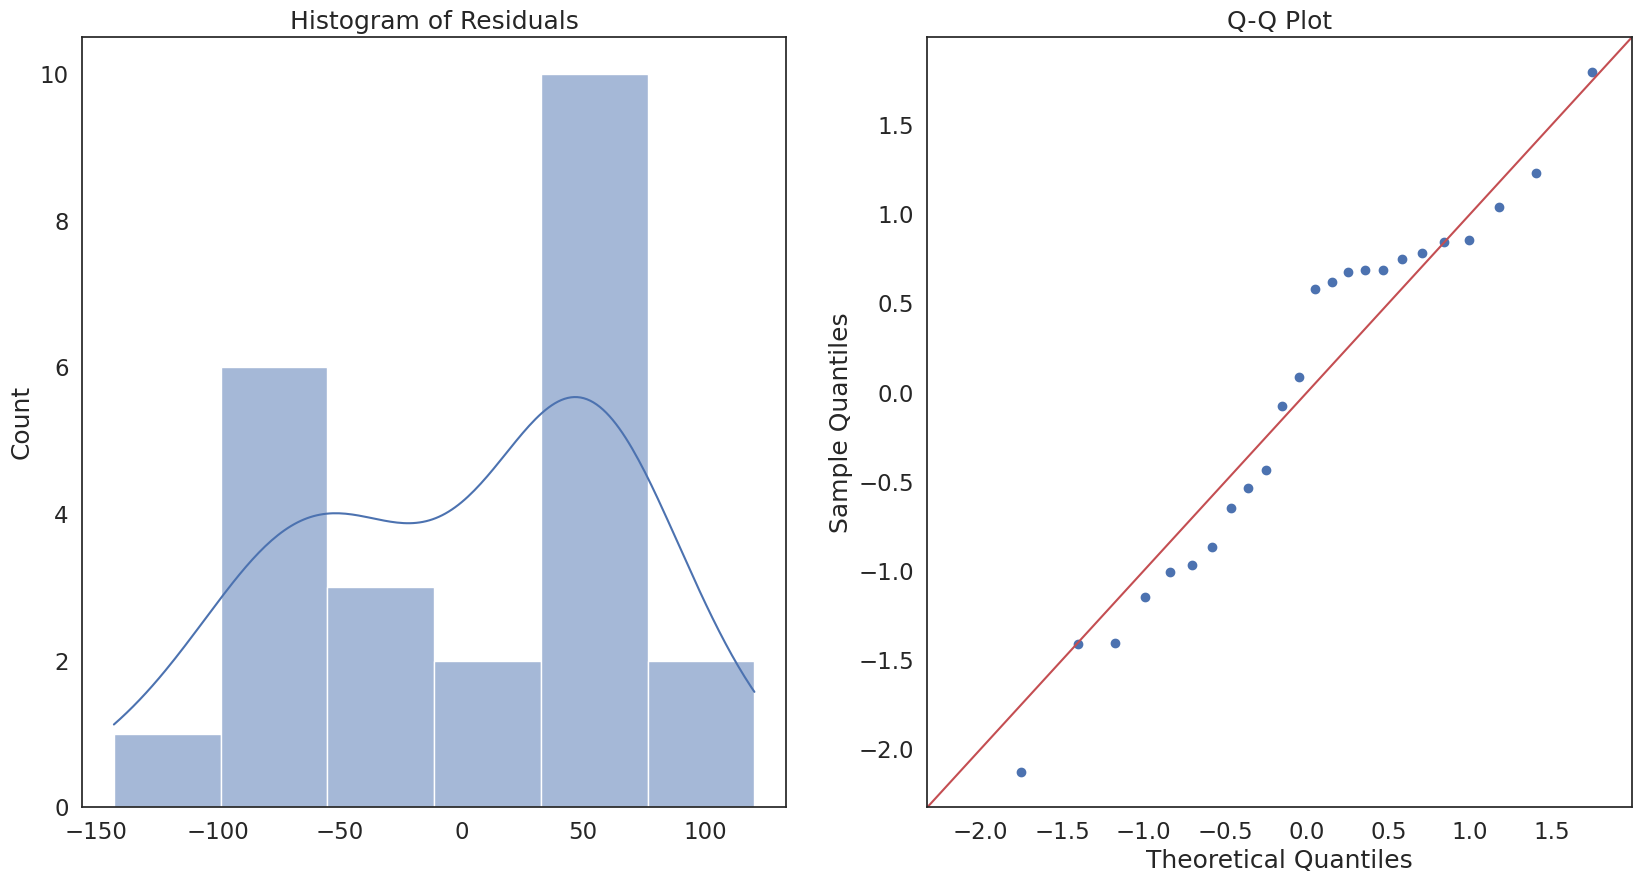

In [81]:
model = ols('total_waste_capita ~  Monthly_number_of_tourists_millions + GDP_per_capita + Population', data=filtered_df_top_six).fit()  # fit a model
residuals = model.resid # get the residuals

# make the figure wider
plt.rcParams["figure.figsize"] = [20, 10]

f, axes = plt.subplots(1, 2)
sns.histplot(residuals, kde=True, ax=axes[0]) # plot the residuals
axes[0].set_title('Histogram of Residuals') # add a title

sm.qqplot(residuals, line='45', fit=True,  ax=axes[1]) # plot the residuals
axes[1].set_title('Q-Q Plot') # add a title

plt.show() # show the plot

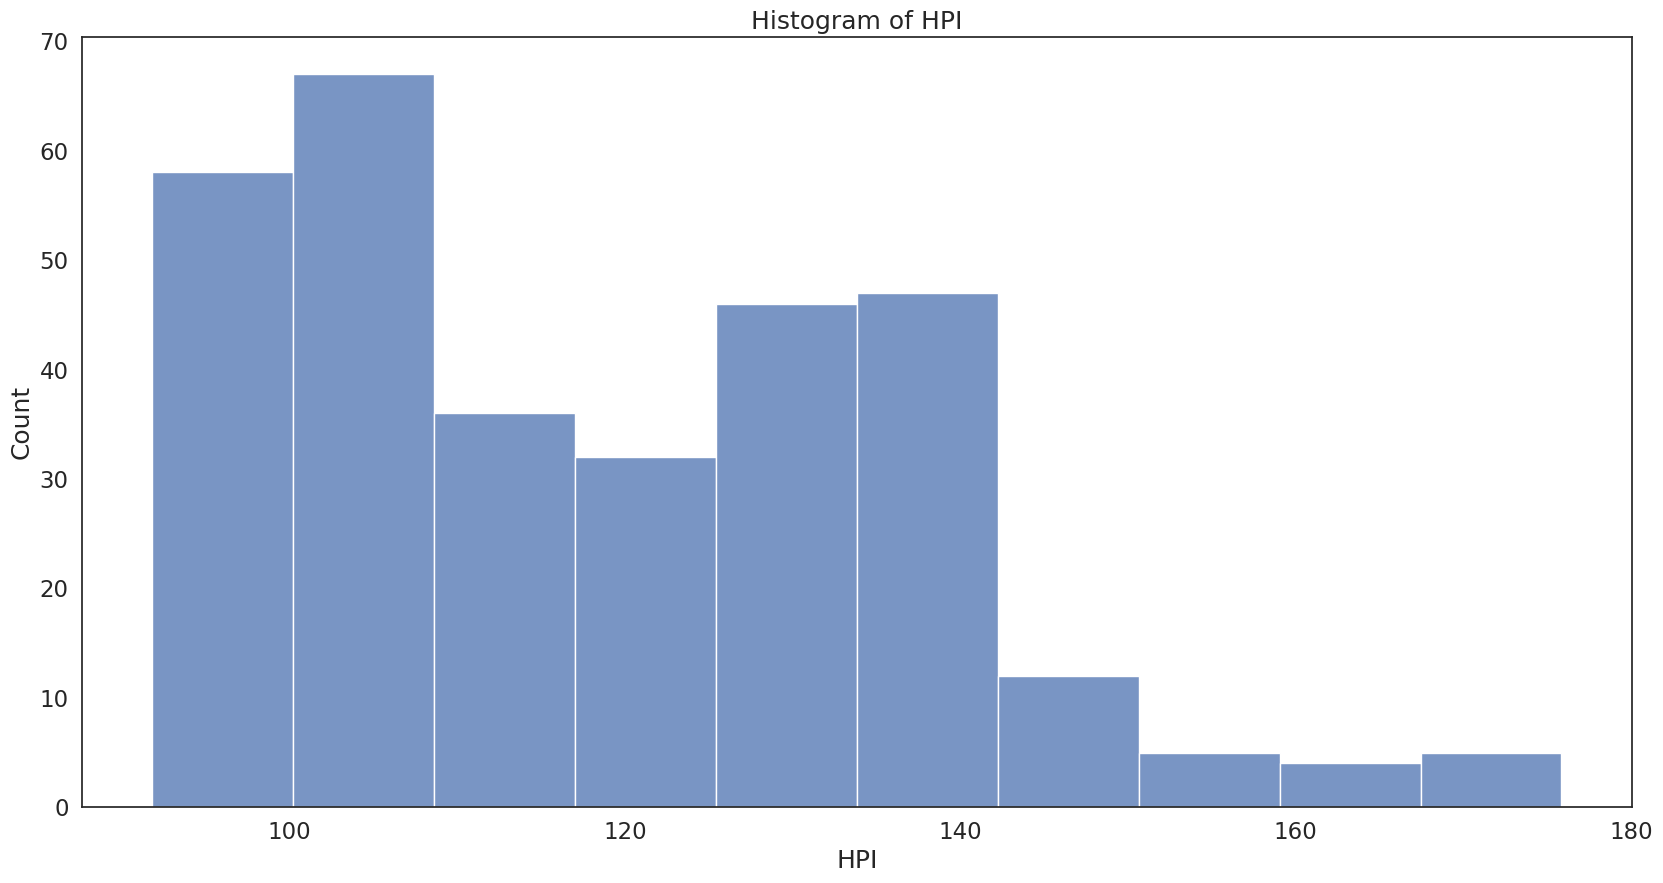

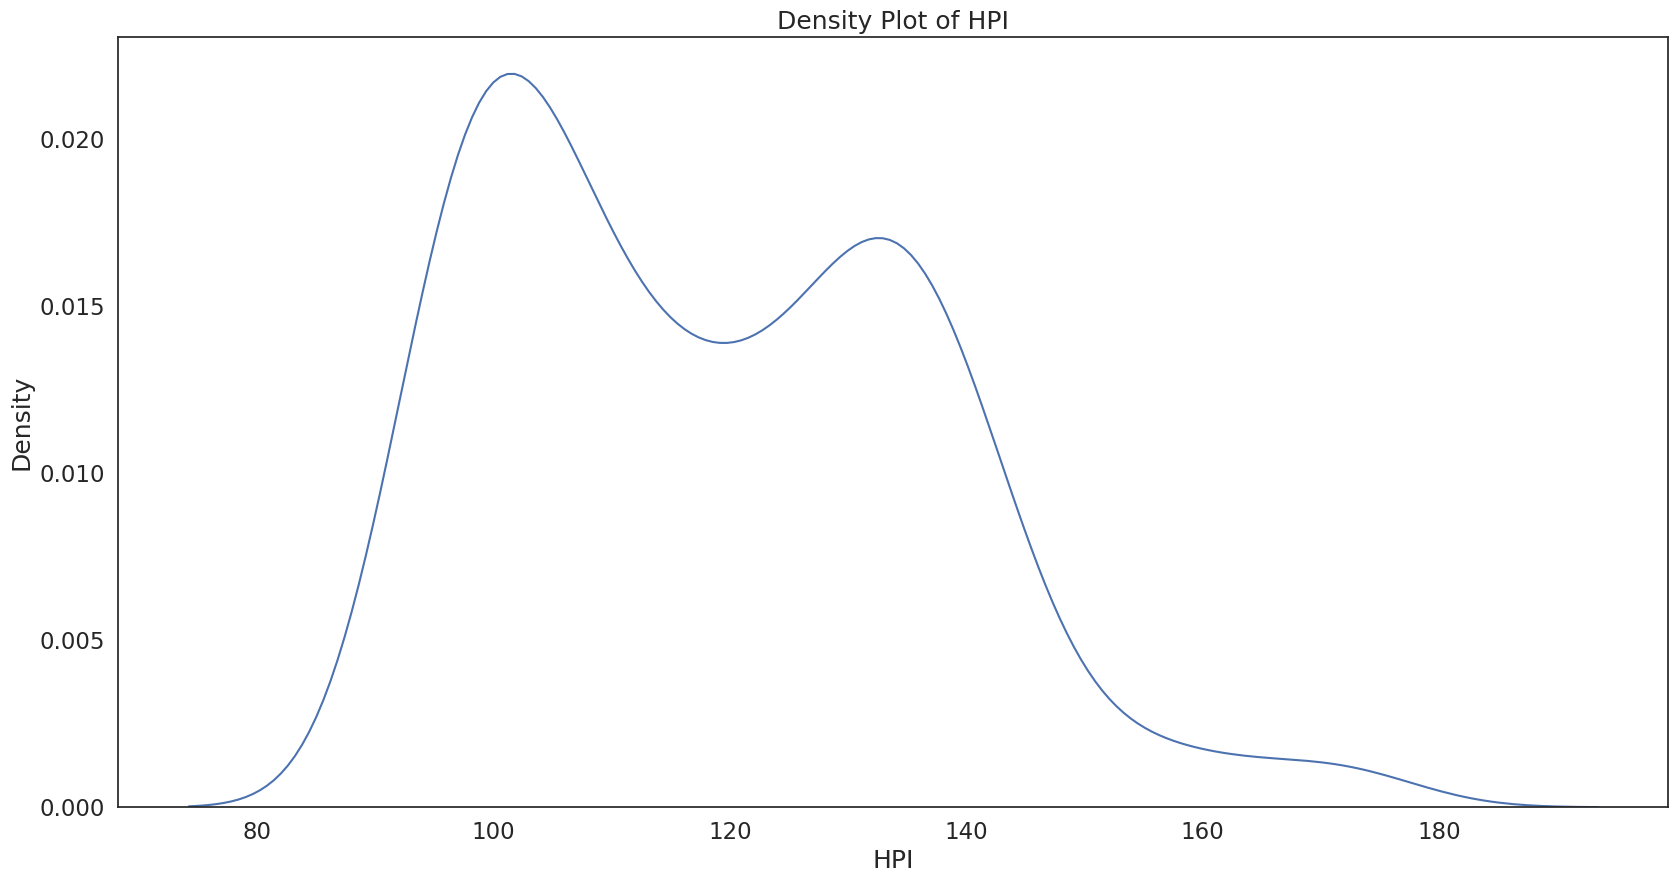

In [82]:
   # Histogram
   sns.histplot(filtered_df_top_six['HPI'], kde=False)
   plt.title('Histogram of HPI')
   plt.show()

   # Density plot
   sns.kdeplot(filtered_df_top_six['HPI'])
   plt.title('Density Plot of HPI')
   plt.show()

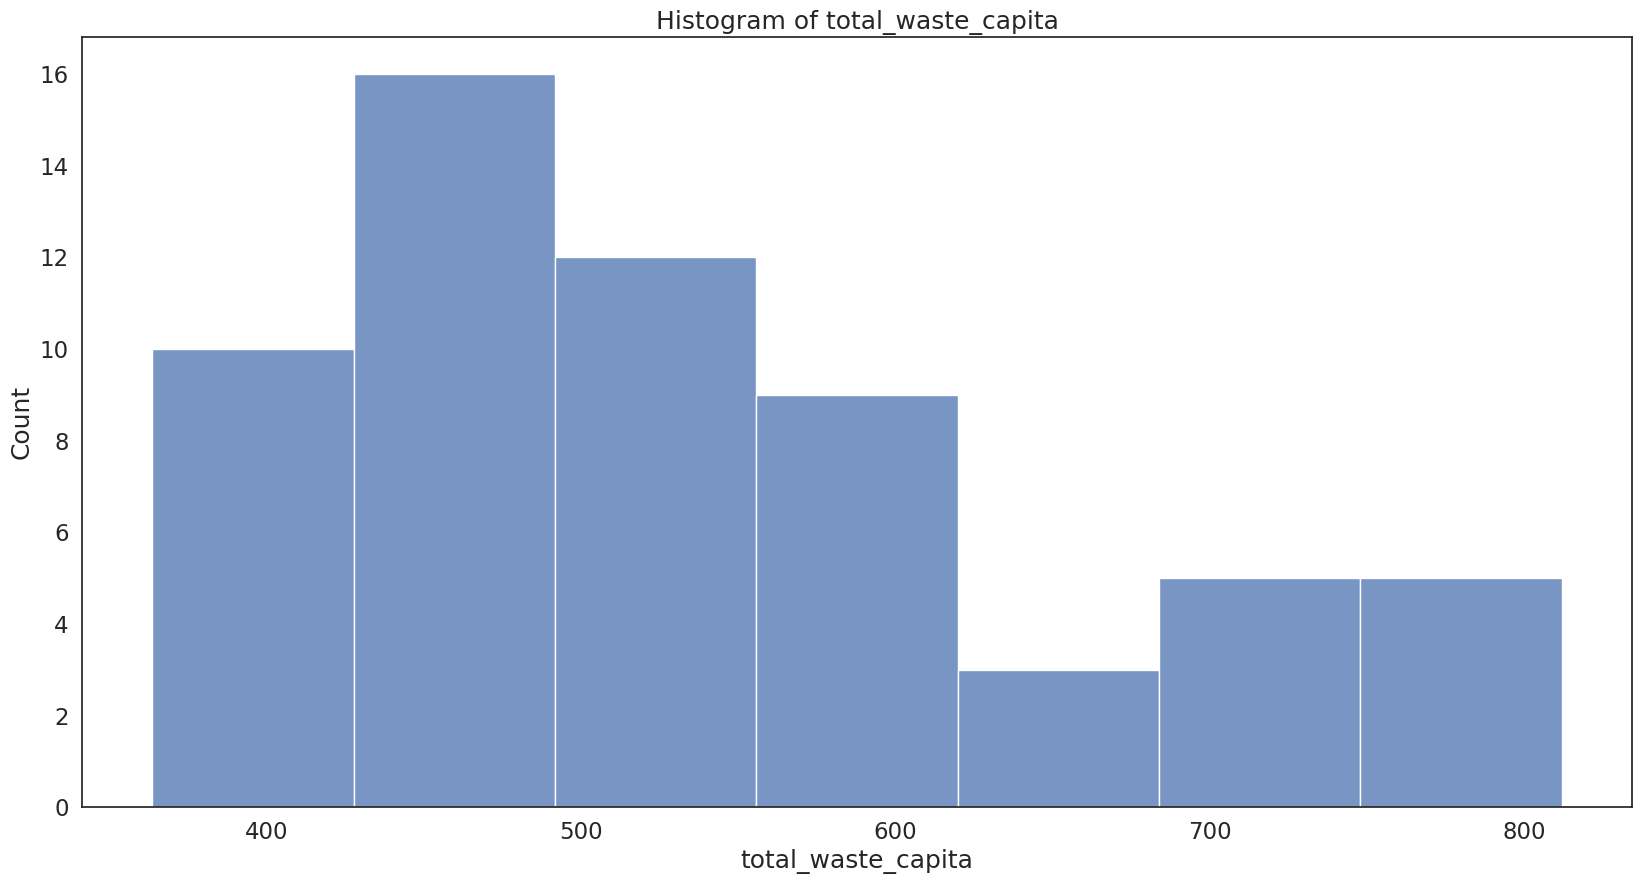

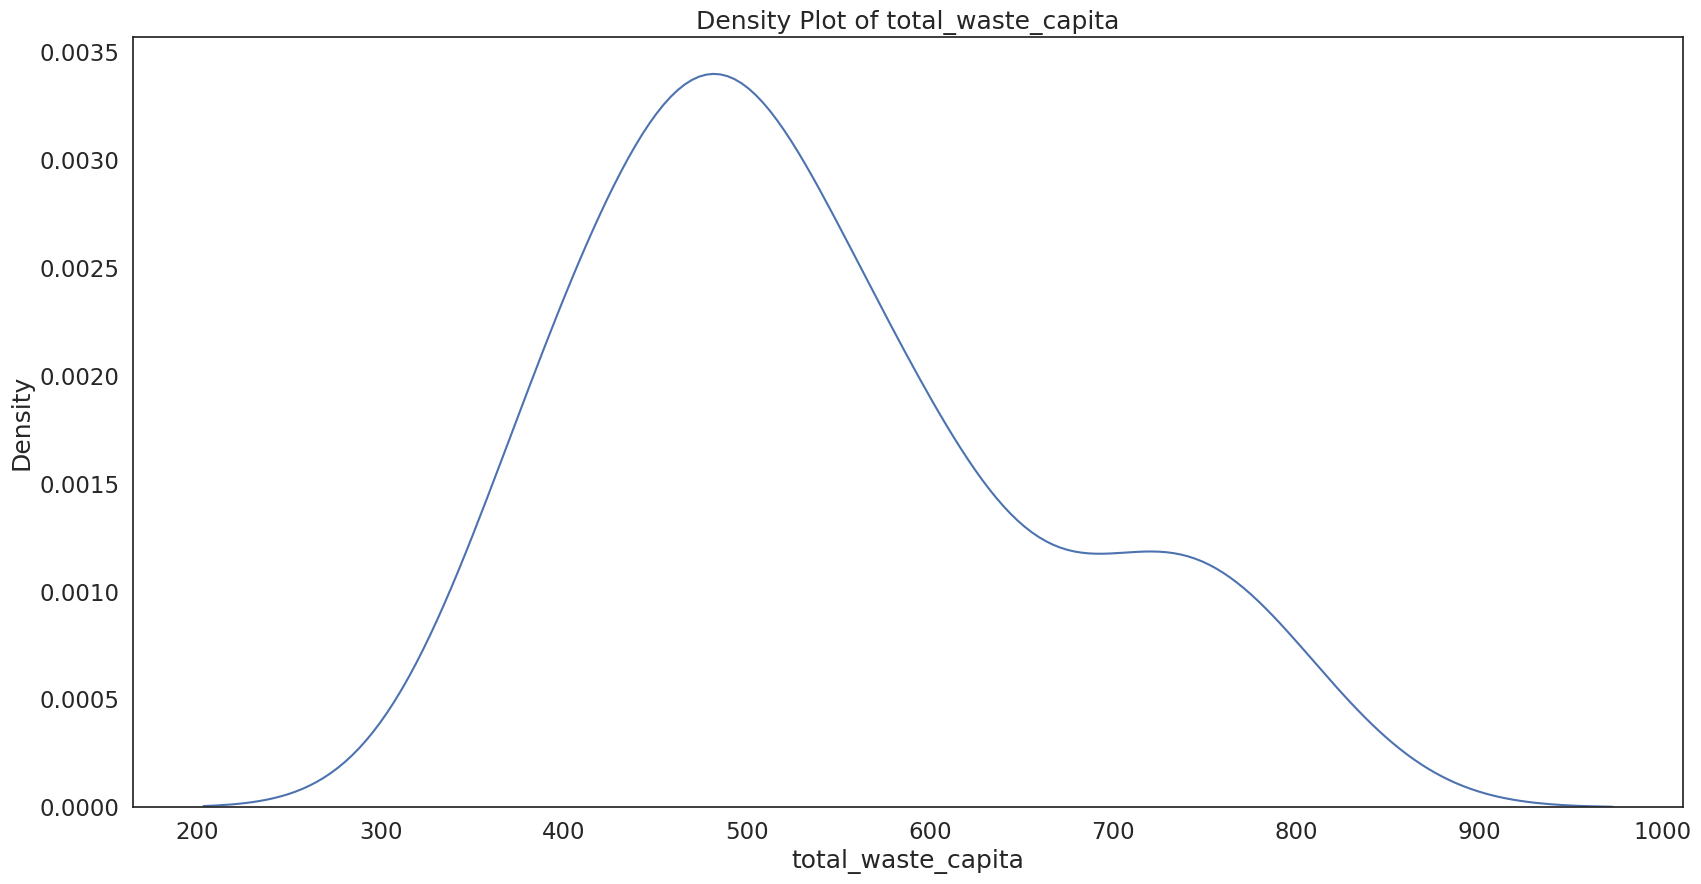

In [83]:
   # Histogram
   sns.histplot(filtered_df_top_six['total_waste_capita'], kde=False)
   plt.title('Histogram of total_waste_capita')
   plt.show()

   # Density plot
   sns.kdeplot(filtered_df_top_six['total_waste_capita'])
   plt.title('Density Plot of total_waste_capita')
   plt.show()

In [84]:
filtered_df_top_six['HPI_logged']=np.log(filtered_df_top_six['HPI'])

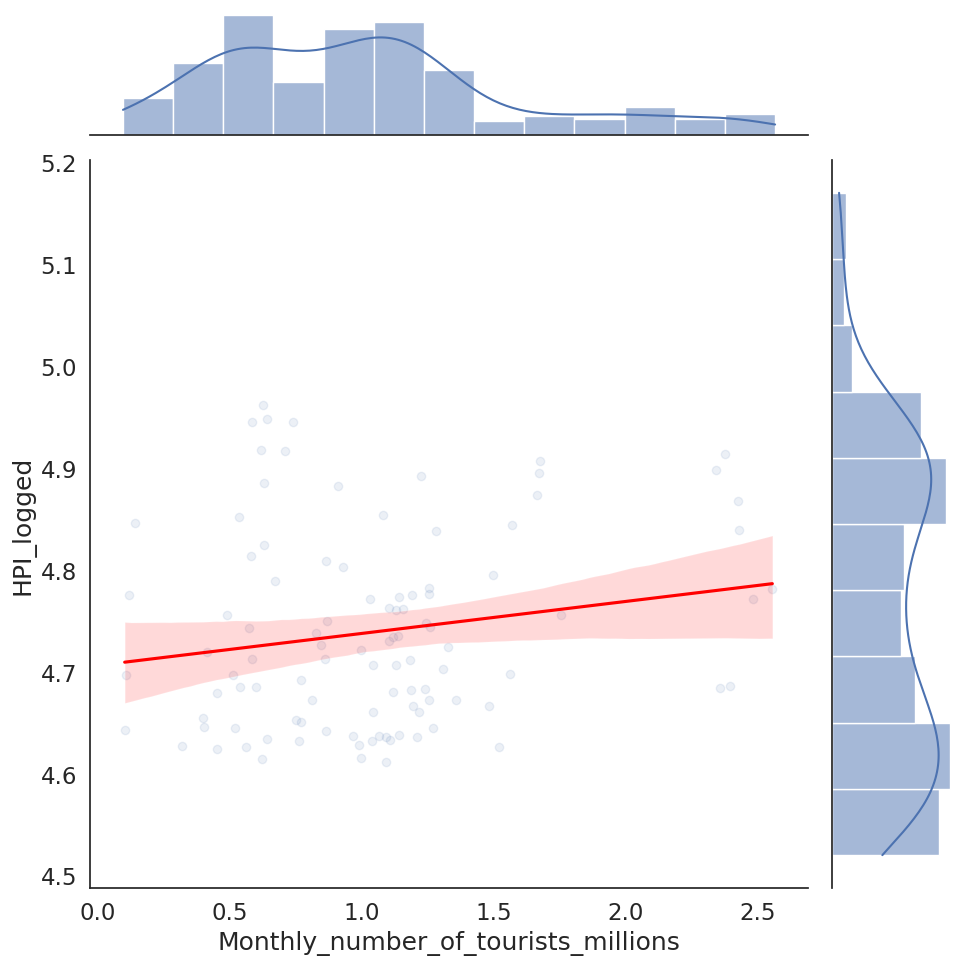

In [85]:
sns.jointplot(data=filtered_df_top_six, x='Monthly_number_of_tourists_millions', y='HPI_logged', kind="reg",  scatter_kws=dict(alpha=0.1), line_kws=dict(color='red'), height=10)

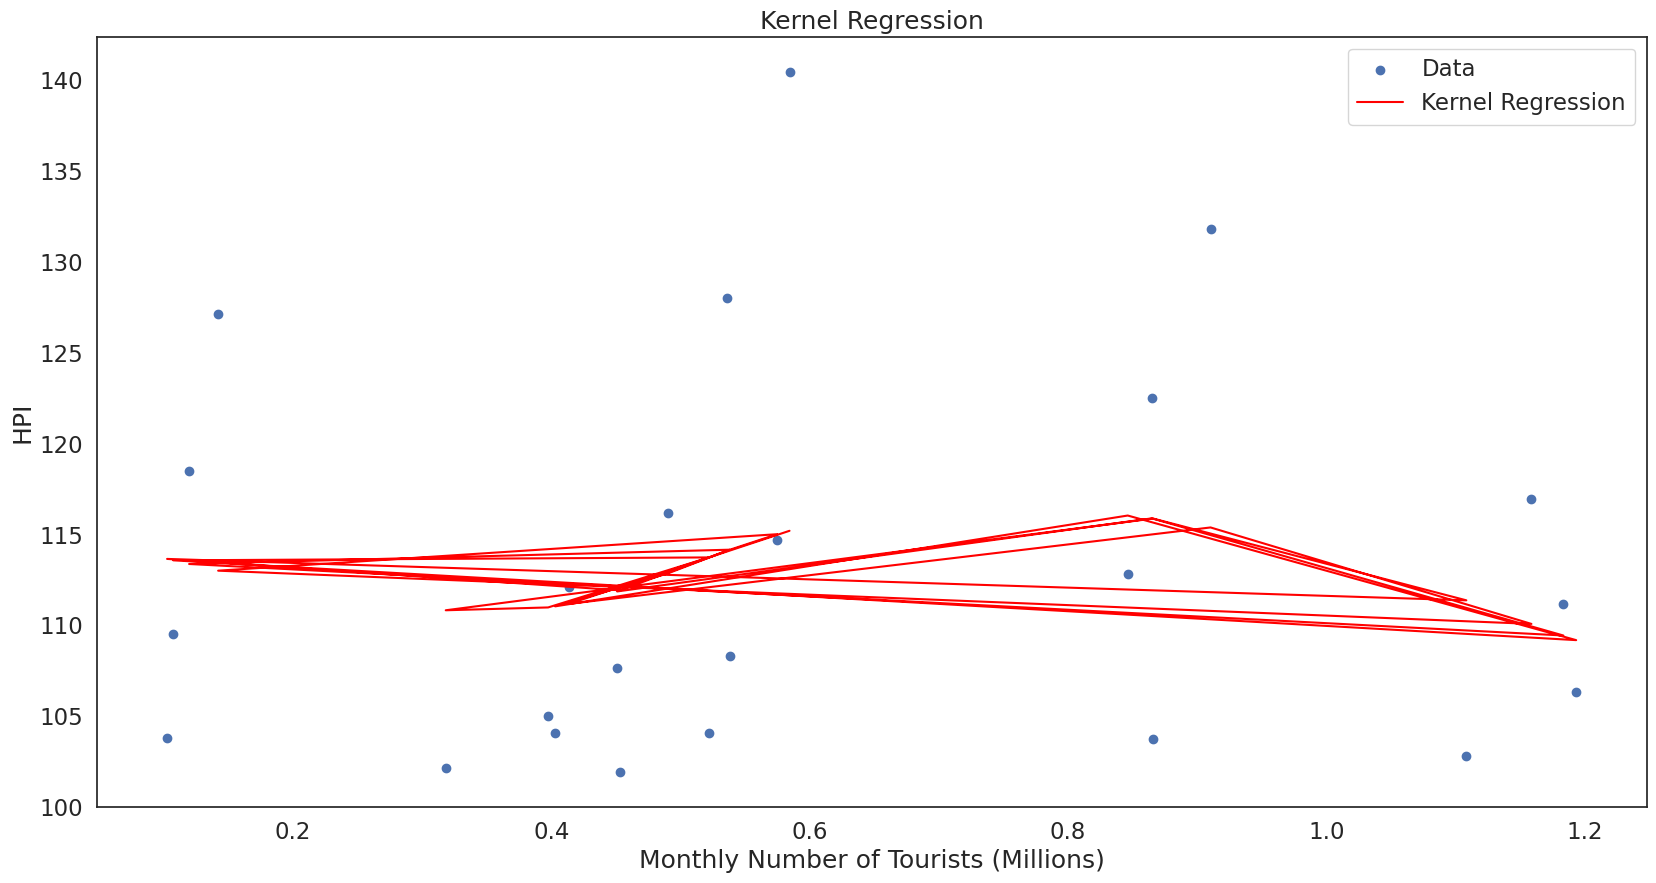

In [87]:
filtered_df_top_six_no_NaN = filtered_df_top_six.dropna()
# Extract the independent variable (X) and dependent variable (y)
X = filtered_df_top_six_no_NaN['Monthly_number_of_tourists_millions'].values
y = filtered_df_top_six_no_NaN['HPI'].values

# Create a KernelReg object
# 'c' specifies the kernel type (e.g., 'gau' for Gaussian)
# 'bw' specifies the bandwidth selection method (e.g., 'cv_ls' for cross-validation)
# 'var_type' specifies the variable types ('c' for continuous)
model = sm.nonparametric.KernelReg(endog=y, exog=X, var_type='c', reg_type='ll', bw='cv_ls')

# Fit the model
results = model.fit()

# Get the predicted values
y_pred = results[0]

# Plot the results (optional)
import matplotlib.pyplot as plt
plt.scatter(X, y, label='Data')
plt.plot(X, y_pred, color='red', label='Kernel Regression')
plt.xlabel('Monthly Number of Tourists (Millions)')
plt.ylabel('HPI')
plt.legend()
plt.title('Kernel Regression')
plt.show()